# Task 4.10 - Part 1

## Table of Contents

1. Importing libraries and revised dataset and prepare the dataframe for further analysis (Task 4.10 Part 1 Step 1)  
    1.1 Import libraries  
    1.2 Import revised dataset  
    1.3 Wrangle the dataframe to reduce the size and avoid memory issues and kernel death  
  
  
2. Consider any security implications that might exist for this new data and address any PII data in the data before continuing (Task 4.10 Part 1 Step 2)  
  
  
3. Create a regional segmentation of the data (Task 4.10 Part 1 Step 3)  
    3.1 Use the region information from the Wikipedia entry to create a 'region' column  
    3.2 Determine whether there is a difference in spending habits between the different U.S. regions  
  
  
4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export this sample (Task 4.10 Part 1 Step 4)  
  

5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents (Task 4.10 Part 1 Step 5)  
    5.1 Investigate 'age' as a customer profile  
    5.2 Investigate 'income' as a customer profile  
    5.3 Investigate family dependents as a customer profile  
    5.4 Investigate 'orders_day_of_week' variable for use in a customer profile  
    5.5 Investigate 'order_hour_of_day' as a variable for use in a customer profile  
    5.6 Investigate vegetarians as a customer profile group  
    5.7 Investigate customers who buy alcohol as a profile group  
    5.8 Investigate customers who buy pet products as a profile group  
    5.9 Calculate customer counts for all departments  
    5.10 Check datatypes of derived columns to optimize dataframe size and memory use  
  
  
6. Create visualizations to show the distribution of profiles (Task 4.10 Part 1 Step 6)  
    6.1 Create visualization comparing customer purchases of product categories by produce by age group  
    6.2 Create visualization comparing the value of customer orders by income group  
    6.3 Create visualization for orders from family units by days of the week  
    6.4 Create a visualization for products ordered most frequently on weekends  
    6.5 Create visualization for orders by hour of day  
    6.6 Create visualization for vegetarian and non-vegetarian customers  
    6.7 Create visualization for customers who purchase alcohol  
    6.8 Create a visualization for customers who buy pet products  
    6.9 Create visualization for customer orders by department using a bar chart  
  
  
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure (Task 4.10 Part 1 Step 7)
  
  
8. Compare customer profiles with regions and departments. Is there a link between customers behaviors across regions? (Task 4.10 Part 1 Step 8)  
    8.1 Compare profile groups for age, income, and family unit across regions  
        8.1.1 Compare customer behavior in product purchases by age. 
    8.2 Compare order frequency by day of the week across regions  
    8.3 Compare order frequency by hour of the day across regions  
    8.4 Compare profile groups for vegetarians across regions  
    8.5 Compare profile groups for alcohol and pet related purchases across regions  
    8.6 Compare orders by department across regions  
        8.6.1 Compare frequency of department orders by price  
        8.6.2 Compare regional customer habits by price range  
        8.6.3 Investigate any difference in when customers order products by department by hour of the day  
    8.7 Investigate customer loyalty behavior by region and family unit  
        8.7.1 Investigate ordering habits by customer loyalty  
        8.7.2 Investigate customer spending types by region and income  
        8.7.3 Customer re-order frequency by region  
    8.8 Other customer profile trends  
        8.8.1 Customer re-order frequency by loyalty, family-type, and income group  
  

9. Export final data set  


# 1. Importing libraries and revised dataset and prepare the dataframe for further analysis (Task 4.10 Part 1 Step 1)

## 1.1 Import libraries

In [1]:
# Import pandas, numpy, os, matplotlib, seaborn, and scipy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1.2 Import revised dataset

In [2]:
# Import orders_products_customers.pkl
path = r'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/4_Python/02-2023_Instacart Basket Analysis'

In [3]:
df_ords_prods_customers = pd.read_pickle(os.path.join(path, "02 Data", 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
# Verify dataframe df_ords_prods_customers
df_ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,median_order_frequency,order_frequency,gender,state,age,date_joined,family_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
df_ords_prods_customers.shape

(32404859, 30)

__Upon starting Step 5.6, I realized it was necessary to import the dataset 'departments_wrangled.csv' to provide the data dictionary for products in the creation of customer profiles by products.__

In [6]:
# Import and check the 'departments_wrangled.csv' dataset
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [7]:
df_departments

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


## 1.3 Wrangle the dataframe to reduce the size and avoid memory issues and kernel death

__With support from others on the CF #dataanalytics slack channel I ran through several checks to look at the integer size required to maintain data integrity and reduce the overall file size as I had several instances of the kernel dying during Task 4.9. I document the changes made below__

In [8]:
# Check datatypes 
df_ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 object 
 7   order_number            int64  
 8   orders_day_of_week      int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  add_to_cart_order       int64  
 12  reordered               int64  
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  average_order           float64
 20  spending_flag           object 
 21  median_order_frequency  float

In [9]:
# Reduce the integer size of the dataframe
df_ords_prods_customers['product_id'] = df_ords_prods_customers['product_id'].astype('int32')
df_ords_prods_customers['aisle_id'] = df_ords_prods_customers['aisle_id'].astype('int8')

In [10]:
df_ords_prods_customers['department_id'] = df_ords_prods_customers['department_id'].astype('int8')
df_ords_prods_customers['prices'] = df_ords_prods_customers['prices'].astype('float16')
df_ords_prods_customers['order_id'] = df_ords_prods_customers['order_id'].astype('int32')

In [11]:
df_ords_prods_customers['order_number'] = df_ords_prods_customers['order_number'].astype('int8')
df_ords_prods_customers['orders_day_of_week'] = df_ords_prods_customers['orders_day_of_week'].astype('int8')
df_ords_prods_customers['order_hour_of_day'] = df_ords_prods_customers['order_hour_of_day'].astype('int8')

In [12]:
df_ords_prods_customers['days_since_prior_order'] = df_ords_prods_customers['days_since_prior_order'].astype('float16')
df_ords_prods_customers['reordered'] = df_ords_prods_customers['reordered'].astype('int8')
df_ords_prods_customers['max_order'] = df_ords_prods_customers['max_order'].astype('int8')

In [13]:
df_ords_prods_customers['age'] = df_ords_prods_customers['age'].astype('int8')
df_ords_prods_customers['family_dependants'] = df_ords_prods_customers['family_dependants'].astype('int8')
df_ords_prods_customers['income'] = df_ords_prods_customers['income'].astype('int32')

In [14]:
df_ords_prods_customers['add_to_cart_order'] = df_ords_prods_customers['add_to_cart_order'].astype('int8')
df_ords_prods_customers['average_order'] = df_ords_prods_customers['average_order'].astype('float32')

In [15]:
# Drop columns that are not required for the analysis
#df_ords_prods_customers = df_ords_prods_customers.drop(columns = ['add_to_cart_order'])
df_ords_prods_customers = df_ords_prods_customers.drop(columns = ['median_order_frequency'])
df_ords_prods_customers = df_ords_prods_customers.drop(columns = ['gender'])

In [16]:
# Rename the column 'price_range_loc'
df_ords_prods_customers.rename(columns={'price_range_loc': 'price_range'}, inplace=True)

In [17]:
# Check wrangled dataframe
df_ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int32  
 1   product_name            object 
 2   aisle_id                int8   
 3   department_id           int8   
 4   prices                  float16
 5   order_id                int32  
 6   user_id                 object 
 7   order_number            int8   
 8   orders_day_of_week      int8   
 9   order_hour_of_day       int8   
 10  days_since_prior_order  float16
 11  add_to_cart_order       int8   
 12  reordered               int8   
 13  price_range             object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int8   
 18  loyalty_flag            object 
 19  average_order           float32
 20  spending_flag           object 
 21  order_frequency         objec

In [18]:
df_ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,loyalty_flag,average_order,spending_flag,order_frequency,state,age,date_joined,family_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Regular customer,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Regular customer,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Regular customer,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Regular customer,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,Regular customer,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620


In [19]:
df_ords_prods_customers.shape

(32404859, 28)

# 2. Consider any security implications that might exist for this new data and address any PII data in the data before continuing (Task 4.10 Part 1 Step 2).

In [20]:
# Identify any PII data
df_ords_prods_customers.dtypes

product_id                  int32
product_name               object
aisle_id                     int8
department_id                int8
prices                    float16
order_id                    int32
user_id                    object
order_number                 int8
orders_day_of_week           int8
order_hour_of_day            int8
days_since_prior_order    float16
add_to_cart_order            int8
reordered                    int8
price_range                object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                    int8
loyalty_flag               object
average_order             float32
spending_flag              object
order_frequency            object
state                      object
age                          int8
date_joined                object
family_dependants            int8
family_status              object
income                      int32
dtype: object

__While I dropped the 'first name' and 'surname' when wrangling the dataframe in Task 4.8 the 'user_id' connects all individual customers with their gender, age, family status, and income and so could be considered PII for whoever can use or acccess the dataset. (While it lists their home location by State it does not allow for individual address identification.) One option to address this would be to randomly allocate new 'id' numbers to each customer, with a security protected key that matches each user ID with the newly assigned ID number.  Instacart staff using the dataset for analysis who did not have access to the key would allow for the protection of all PII in the dataframe.__

# 3. Create a regional segmentation of the data (Task 4.10 Part 1 Step 3)


## 3.1 Use the region information from the Wikipedia entry to create a 'region' column.

In [21]:
# Check values of 'states' column
df_ords_prods_customers['state'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [22]:
# Group states by region with regional definitions from:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [23]:
# Create the new column 'region'
df_ords_prods_customers.loc[df_ords_prods_customers['state'].isin(Northeast), 'region'] = 'Northeast'

In [24]:
df_ords_prods_customers.loc[df_ords_prods_customers['state'].isin(Midwest), 'region'] = 'Midwest'

In [25]:
df_ords_prods_customers.loc[df_ords_prods_customers['state'].isin(South), 'region'] = 'South'

In [26]:
df_ords_prods_customers.loc[df_ords_prods_customers['state'].isin(West), 'region'] = 'West'

In [27]:
# Verify new column in dataframe
df_ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,average_order,spending_flag,order_frequency,state,age,date_joined,family_dependants,family_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,6.935811,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [28]:
df_ords_prods_customers['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [29]:
df_ords_prods_customers.shape

(32404859, 29)

## 3.2 Determine whether there is a difference in spending habits between the different U.S. regions

In [30]:
# Create a crosstab to compare the spending flag by region
crosstab_regspend = pd.crosstab(df_ords_prods_customers['spending_flag'], df_ords_prods_customers['region'], dropna = False)

In [31]:
crosstab_regspend

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


# 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export this sample (Task 4.10 Part 1 Step 4).

In [32]:
# Create flag for customer activity for low and regular customer activity levels
df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] < 5, 'customer_activity'] = 'Low activity'

In [33]:
df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] >= 5, 'customer_activity'] = 'Regular activity'

In [34]:
# Check the customer activity flag captured all customers
df_ords_prods_customers['customer_activity'].value_counts(dropna = False)

Regular activity    30964564
Low activity         1440295
Name: customer_activity, dtype: int64

In [35]:
df_ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,order_frequency,state,age,date_joined,family_dependants,family_status,income,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity


In [36]:
# Create a subset that excludes the low-activity customers
df_regularly_active_customers = df_ords_prods_customers.loc[df_ords_prods_customers['customer_activity'] == 'Regular activity']

In [37]:
df_regularly_active_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,order_frequency,state,age,date_joined,family_dependants,family_status,income,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity


In [38]:
df_regularly_active_customers.shape

(30964564, 30)

In [39]:
# Export the subset excluding the low-activity customers
df_regularly_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_regularly_active_customers.pkl'))

# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents (Task 4.10 Part 1 Step 5).

In [40]:
# Create customer profiles using the regularly active subset (as the CFO is not interested in low activity customers)
df_customer_profile = df_regularly_active_customers

In [41]:
df_customer_profile.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,order_frequency,state,age,date_joined,family_dependants,family_status,income,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,Low spender,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity


## 5.1 Investigate 'age' as a customer profile

In [42]:
# Review descriptive statistics of the 'age' variable
df_customer_profile['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

__'age' follows a normal distribution with 18 as youngest, 81 as oldest and 49.5 as the median (33 at 25% and 65 at 75%). Based on this, I will follow the classification of age groups as:__  

__Youth >= 18 and <= 33  
Middleage > 33 and < 65  
Retired >= 65__

In [43]:
# Create age group categories using 'youth', 'middle', and 'senior'
df_customer_profile.loc[(df_customer_profile['age'] >= 18) & (df_customer_profile['age'] <= 33), 'age_group'] = 'Youth'
df_customer_profile.loc[(df_customer_profile['age'] > 33) & (df_customer_profile['age'] < 65), 'age_group'] = 'Middleage'
df_customer_profile.loc[df_customer_profile['age'] >= 65, 'age_group'] = 'Retired'

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/3691548822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile.loc[(df_customer_profile['age'] >= 18) & (df_customer_profile['age'] <= 33), 'age_group'] = 'Youth'


In [44]:
#Check the new column value counts
df_customer_profile['age_group'].value_counts(dropna = False)

Middleage    15011555
Retired       8195544
Youth         7757465
Name: age_group, dtype: int64

In [45]:
# Check the dataframe with the derived column
df_customer_profile.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency,state,age,date_joined,family_dependants,family_status,income,region,customer_activity,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,Frequent customer,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired


In [46]:
df_customer_profile.shape

(30964564, 31)

## 5.2 Investigate income as a customer profile

In [47]:
# Review descriptive statistics of the 'income' variable
df_customer_profile['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

__The distribution of 'income' is slightly right-skewed with a minimum of USD 25,903 and a maximum of USD 593,901 with a mean of USD 99,675. I have taken the income groups to be:__  
__low (<= USD 55,000)  
middle (> USD 55,000 and < USD 125,000)  
high (>= USD 125,000)__ 

In [48]:
# Create income groups for low, middle, and high income categories
df_customer_profile.loc[df_customer_profile['income'] <= 55000 , 'income_group'] = 'Low'
df_customer_profile.loc[(df_customer_profile['income'] > 55000) & (df_customer_profile['income'] < 125000), 'income_group'] = 'Middle'
df_customer_profile.loc[df_customer_profile['income'] >= 125000, 'income_group'] = 'High'

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/7461527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile.loc[df_customer_profile['income'] <= 55000 , 'income_group'] = 'Low'


In [49]:
# Check the derived column 'income_group'
df_customer_profile['income_group'].value_counts(dropna = False)

Middle    18234132
High       8278044
Low        4452388
Name: income_group, dtype: int64

In [50]:
# Check the dataframe with the newly derived column 'income_group'
df_customer_profile.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,family_dependants,family_status,income,region,customer_activity,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low


## 5.3 Investigate 'family_dependants' as a customer profile

In [51]:
# Review descriptive statistics of the 'family_dependants' variable
df_customer_profile['family_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: family_dependants, dtype: float64

__'family_dependants' is slightly left skewed with minimum of 0 and maximum of 3 and a mean of 1.5 and 50% of 2. I believe it is worth delineating between a small family and one with no children as this would influence shopping patterns and marketing. From my understanding of the dataset, specifically the 'family_dependants' and the 'family_status' variables, I have concluded that a '0' value for 'family_dependants' does not necessarily mean that there are no children as dependants could include a spouse/ partner. It is necessary to compare 'family_dependants' and 'family_status' - using a crosstab - to identify customers without children.__
  
__I have defined family groups as:
'small' = 0  
'midsize' = 1 or = 2  
'large' (>2)__

In [52]:
# Create family groups
df_customer_profile.loc[df_customer_profile['family_dependants'] <= 1, 'family_size'] = 'Small'
df_customer_profile.loc[df_customer_profile['family_dependants'] == 2, 'family_size'] = 'Medium'
df_customer_profile.loc[df_customer_profile['family_dependants'] > 2, 'family_size'] = 'Large'

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/2355521706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile.loc[df_customer_profile['family_dependants'] <= 1, 'family_size'] = 'Small'


In [53]:
# Check the derived column 'family_size'
df_customer_profile['family_size'].value_counts(dropna = False)

Small     15458787
Large      7772516
Medium     7733261
Name: family_size, dtype: int64

In [54]:
# Check the dataframe with the newly derived column 'family_size'
df_customer_profile.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,age,date_joined,family_dependants,family_status,income,region,customer_activity,age_group,income_group,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,81,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small


In [55]:
# Review descriptive statistics of 'family_status'
df_customer_profile['family_status'].describe()

count     30964564
unique           4
top        married
freq      21743711
Name: family_status, dtype: object

In [56]:
# View all unique values of 'family_status"
print(df_customer_profile['family_status'].unique())

['married' 'living with parents and siblings' 'divorced/widowed' 'single']


In [57]:
# Explore the relationship between 'family_dependants' and 'family_status'
crosstab_family_size = pd.crosstab(df_customer_profile['family_dependants'], df_customer_profile['family_status'], dropna = False)

In [58]:
crosstab_family_size

family_status,divorced/widowed,living with parents and siblings,married,single
family_dependants,,,,
0,2645271,0,0,5094410
1,0,508045,7211061,0
2,0,484658,7248603,0
3,0,488469,7284047,0


__This gives a clearer break-down of family units for analysis for targeted marketing.  I do note that the category of 'living with parents and siblings' could be confusing as someone identifying as divorced/ widowed could also be living with their parents and/ or siblings, but I will ignore this factor for the purpose of this analysis. Using the above information I have grouped family units into the following groups:__

__'single, no kids' = divorced/ widowed or single and 0 dependants__  
__'single parent' = divorced/ widowed or single and >=1 dependants__  
__'married, no kids' = married and 1 dependant__  
__'married with kids' = married and >=1 dependant__  
__'mixed family' = living with parents and siblings__

In [59]:
# Create family unit groups crossing 'family_dependants' and 'family_status' as another customer profile for the analysis
df_customer_profile.loc[(df_customer_profile['family_status'] == 'divorced/widowed') | (df_customer_profile['family_status'] == 'single') & (df_customer_profile['family_dependants'] == 0), 'family_unit'] = 'Single, no kids'
df_customer_profile.loc[(df_customer_profile['family_status'] == 'divorced/widowed') | (df_customer_profile['family_status'] == 'single') & (df_customer_profile['family_dependants'] >= 1), 'family_unit'] = 'Single with kids'

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/745427491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile.loc[(df_customer_profile['family_status'] == 'divorced/widowed') | (df_customer_profile['family_status'] == 'single') & (df_customer_profile['family_dependants'] == 0), 'family_unit'] = 'Single, no kids'


In [60]:
df_customer_profile.loc[(df_customer_profile['family_status'] == 'married') & (df_customer_profile['family_dependants'] ==1), 'family_unit'] = 'Married, no kids'                                                                                 
df_customer_profile.loc[(df_customer_profile['family_status'] == 'married') & (df_customer_profile['family_dependants'] >=1), 'family_unit'] = 'Married with kids'

In [61]:
df_customer_profile.loc[df_customer_profile['family_status'] == 'living with parents and siblings', 'family_unit'] = 'Mixed family'

In [62]:
# Check accuracy of new column 'family_unit'
df_customer_profile['family_unit'].value_counts(dropna = False)

Married with kids    21743711
Single, no kids       5094410
Single with kids      2645271
Mixed family          1481172
Name: family_unit, dtype: int64

In [63]:
# Check dataframe with newly rerived column 'family_unit'
df_customer_profile.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,family_dependants,family_status,income,region,customer_activity,age_group,income_group,family_size,family_unit
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small,Married with kids
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small,Married with kids
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small,Married with kids
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small,Married with kids
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,...,8/1/2019,1,married,49620,Midwest,Regular activity,Retired,Low,Small,Married with kids


## 5.4 Investigate 'orders_day_of_week' variable for use in a customer profile 

In [64]:
# Check descriptive statistics of 'orders_day_of_week'
df_customer_profile['orders_day_of_week'].describe()

count    3.096456e+07
mean     2.741397e+00
std      2.089254e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: orders_day_of_week, dtype: float64

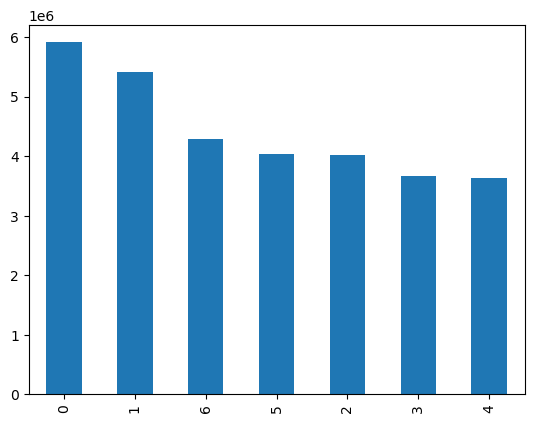

In [65]:
# Create a bar chart
bar_orders_day = df_customer_profile['orders_day_of_week'].value_counts().plot.bar()

__The three most popular days for placing orders are Saturday (Day 0), Sunday (Day 1) and Friday (6), so grouping by weekend and weekday provides an interesting profile for marketing targeting sales at the weekend.__

## 5.5 Investigate 'order_hour_of_day' as a variable for use in a customer profile

In [66]:
# Check descriptive statistics of 'order_hour_of_day'
df_customer_profile['order_hour_of_day'].describe()

count    3.096456e+07
mean     1.341098e+01
std      4.248845e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

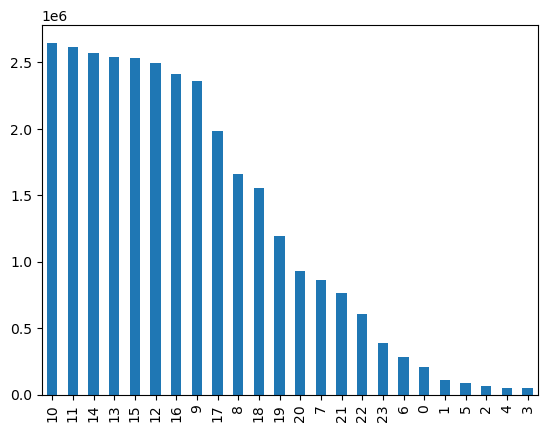

In [67]:
# Create a bar chart to visualize the frequency of order by hour of day
bar_order_by_hour = df_customer_profile['order_hour_of_day'].value_counts().plot.bar()

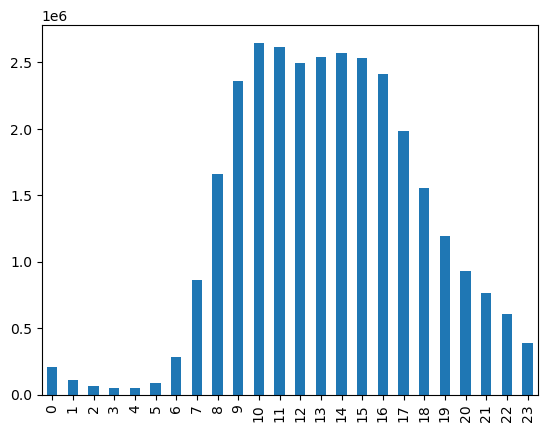

In [68]:
# View bar chart in the series order
bar_order_by_hour = df_customer_profile['order_hour_of_day'].value_counts().sort_index().plot.bar()

__Viewing the descriptive statistics and the frequency distribution I have grouped the hours of the day into 4 categories when orders are made that could be used as a profile for marketing:__  
__early morning: 0-7__  
__morning: 8-12__  
__afternoon: 12-17__  
__evening: 18-23__

In [69]:
# Create order_times as a derived column for the dataset
df_customer_profile.loc[df_customer_profile['order_hour_of_day'] <= 7, 'order_times'] = 'Early morning'
df_customer_profile.loc[(df_customer_profile['order_hour_of_day'] > 7) & (df_customer_profile['order_hour_of_day']< 12), 'order_times'] = 'Morning'
df_customer_profile.loc[(df_customer_profile['order_hour_of_day'] >= 12) & (df_customer_profile['order_hour_of_day']< 18), 'order_times'] = 'Afternoon'
df_customer_profile.loc[(df_customer_profile['order_hour_of_day'] >= 18) & (df_customer_profile['order_hour_of_day']<= 23), 'order_times'] = 'Evening'

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/4214325861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile.loc[df_customer_profile['order_hour_of_day'] <= 7, 'order_times'] = 'Early morning'


In [70]:
# Check the derived column and the new database
df_customer_profile['order_times'].value_counts(dropna = False)

Afternoon        14534966
Morning           9287345
Evening           5430696
Early morning     1711557
Name: order_times, dtype: int64

In [71]:
df_customer_profile.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,family_dependants,family_status,income,region,customer_activity,age_group,income_group,family_size,family_unit,order_times
32404843,49235,Organic Half & Half,53,16,1.799805,3310701,27382,5,3,9,...,3,married,37867,Northeast,Regular activity,Retired,Low,Large,Married with kids,Morning
32404844,49235,Organic Half & Half,53,16,1.799805,527883,27382,6,1,12,...,3,married,37867,Northeast,Regular activity,Retired,Low,Large,Married with kids,Afternoon
32404845,49235,Organic Half & Half,53,16,1.799805,685496,27382,7,4,8,...,3,married,37867,Northeast,Regular activity,Retired,Low,Large,Married with kids,Morning
32404846,49235,Organic Half & Half,53,16,1.799805,1224680,27382,8,1,7,...,3,married,37867,Northeast,Regular activity,Retired,Low,Large,Married with kids,Early morning
32404847,49235,Organic Half & Half,53,16,1.799805,2223687,27382,9,2,12,...,3,married,37867,Northeast,Regular activity,Retired,Low,Large,Married with kids,Afternoon


## 5.6 Investigate vegetarian customers as a profile group

__This requires importing the data director for products, 'departments_wrangled.csv'. I will revert back to Step 1 to import the file as a dataframe and verify before using here__

In [72]:
# View list of departments to match against department_id from the main dataframe
df_departments

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [73]:
# Create a profile looking at vegetarians and non-vegetarians
result = []

for value in df_customer_profile['department_id']:
    if value in [11]:
        result.append('Non veg')
    else:
        result.append('Vegetarian')

In [74]:
result

['Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetarian',
 'Vegetari

In [75]:
df_customer_profile['vegetarian'] = result

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/66035291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile['vegetarian'] = result


In [76]:
# Check new derived columne for vegetarians
df_customer_profile['vegetarian'].value_counts(dropna = False)

Vegetarian    30540258
Non veg         424306
Name: vegetarian, dtype: int64

In [77]:
# Verify by cross checking vegetarians against family units
crosstab_vegetarian = pd.crosstab(df_customer_profile['vegetarian'], df_customer_profile['family_status'], dropna = False)

In [78]:
crosstab_vegetarian

family_status,divorced/widowed,living with parents and siblings,married,single
vegetarian,,,,
Non veg,36313,20201,297900,69892
Vegetarian,2608958,1460971,21445811,5024518


## 5.7 Investigate customers who buy alcohol as a profile group

In [79]:
# Create a profile for drinkers and non-drinkers
result2 = []

for value in df_customer_profile['department_id']:
    if value in [4]:
        result2.append('Drinker')
    else:
        result2.append('Teetotal')

In [80]:
df_customer_profile['alcohol'] = result2

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/1922072112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile['alcohol'] = result2


In [81]:
# Check new derived column for customers who drink alcohol
df_customer_profile['alcohol'].value_counts(dropna = False)

Teetotal    21885291
Drinker      9079273
Name: alcohol, dtype: int64

In [82]:
# Compare the age of customers with those who drink and don't drink alcohol
crosstab_drinkers_by_age = pd.crosstab(df_customer_profile['alcohol'], df_customer_profile['age'], dropna = False)

In [83]:
crosstab_drinkers_by_age

age,18,19,20,21,22,23,24,25,26,27,...,72,73,74,75,76,77,78,79,80,81
alcohol,,,,,,,,,,,,,,,,,,,,,
Drinker,138777,144918,141899,140855,146336,146119,140424,128398,142742,150450,...,137805,148166,138319,146406,135910,138738,139467,150368,145629,143232
Teetotal,339680,351159,338295,348261,344475,346812,347184,320926,347150,350621,...,342079,351287,338849,352823,341438,339261,331652,357969,347121,342615


In [84]:
crosstab_drinkers_by_agegroup = pd.crosstab(df_customer_profile['alcohol'], df_customer_profile['age_group'], dropna = False)

In [85]:
crosstab_drinkers_by_agegroup

age_group,Middleage,Retired,Youth
alcohol,,,
Drinker,4402172,2408104,2268997
Teetotal,10609383,5787440,5488468


## 5.8 Investigate customers who buy pet products as a profile group

In [86]:
# Create a profile for cusomters who make orders from the 'pets' department
result3 = []

for value in df_customer_profile['department_id']:
    if value in [17]:
        result3.append('Have Pet')
    else:
        result3.append('No Pet')

In [87]:
df_customer_profile['pets'] = result3

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/840269388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile['pets'] = result3


In [88]:
df_customer_profile['pets'].value_counts(dropna = False)

No Pet      30264707
Have Pet      699857
Name: pets, dtype: int64

In [89]:
# Compare family units with customers who have pets
crosstab_family_pets = pd.crosstab(df_customer_profile['pets'], df_customer_profile['family_unit'], dropna = False)

In [90]:
crosstab_family_pets

family_unit,Married with kids,Mixed family,Single with kids,"Single, no kids"
pets,,,,
Have Pet,495150,33349,58446,112912
No Pet,21248561,1447823,2586825,4981498


## 5.9 Calculate customer counts for all departments

In [91]:
#Print departments dataframe
df_departments

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [92]:
# Use df_departments to show customer count by department in df_customer_profile
# Create a dictionary from df_departments as was used in Exercise 4.4
df_departments

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [93]:
# Re-order so the index starts from 1
df_departments.index = df_departments.index + 1

In [94]:
df_departments

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [95]:
# Add a new index column and rename as 'department_id'
df_departments = df_departments.reset_index()

In [96]:
df_departments.rename(columns = {'index': 'department_id'}, inplace = True)

In [97]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [98]:
# Use the map() and zip()functiond to create a dictionary matching department_id and department
department_map=dict(zip(df_departments['department_id'], df_departments['department']))

In [99]:
# Check the dictionary
department_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [100]:
# Create map of customers for each department using the map() function
df_customer_profile['department'] = df_customer_profile['department_id'].map(department_map)

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1950/1913703237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_profile['department'] = df_customer_profile['department_id'].map(department_map)


In [101]:
# Check the newly created column for 'departments'
df_customer_profile['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

## 5.10 Check datatypes of derived columns to optimize dataframe size and memory use

In [102]:
df_customer_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404847
Data columns (total 39 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int32  
 1   product_name            object 
 2   aisle_id                int8   
 3   department_id           int8   
 4   prices                  float16
 5   order_id                int32  
 6   user_id                 object 
 7   order_number            int8   
 8   orders_day_of_week      int8   
 9   order_hour_of_day       int8   
 10  days_since_prior_order  float16
 11  add_to_cart_order       int8   
 12  reordered               int8   
 13  price_range             object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int8   
 18  loyalty_flag            object 
 19  average_order           float32
 20  spending_flag           object 
 21  order_frequency         objec

# 6. Create visualizations to show the distribution of profiles (Task 4.10 Part 1 Step 6)

In [103]:
# The analysis on some of the customer profiles is very demanding of memory that can cause kernel death. Before starting to create visualizations or dig deeper on the analysis of the customer profile behaviors it is necessary to create a smaller, 30% sample to use. 

__# The analysis on some of the customer profiles is very demanding of memory that can cause kernel death. Before starting to create visualizations or dig deeper on the analysis of the customer profile behaviors it is necessary to create a smaller, 30% sample to use.__

In [104]:
# First, rename values of income_group for easier identification when comparing with other customer profile groups
df_customer_profile['income_group'].replace({'High':'High income', 'Middle':'Middle income', 'Low':'Low income'})

0           Low income
1           Low income
2           Low income
3           Low income
4           Low income
               ...    
32404843    Low income
32404844    Low income
32404845    Low income
32404846    Low income
32404847    Low income
Name: income_group, Length: 30964564, dtype: object

In [105]:
# Create a list
np.random.seed(4)

In [106]:
# Create a list of True/ False values of the test np.random.rant() >= 0.7
dev = np.random.rand(len(df_customer_profile)) <= 0.7

In [107]:
# Check the list 'dev' that was created
dev

array([False,  True, False, ...,  True,  True,  True])

In [108]:
# Test the np_random_rand() function
np.random.rand(10)

array([0.40196087, 0.10262327, 0.49905822, 0.76022198, 0.8841328 ,
       0.70943956, 0.41872088, 0.11397028, 0.00622199, 0.26237651])

In [109]:
# Store 70% of the sample in the dataframe big
big = df_customer_profile[dev]

In [110]:
# Store 30% of the sample in the dataframe small
small = df_customer_profile[~dev]

In [111]:
# Check the creation of your samples
len(df_customer_profile)

30964564

In [112]:
len(big) + len(small)

30964564

In [113]:
# Create a subset of dafaframe small with columns necessary to the analysis, 'prices' and 'orders_days_of_week'
df_customer_profile_sample = small

In [114]:
# Check the subset
df_customer_profile_sample.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,customer_activity,age_group,income_group,family_size,family_unit,order_times,vegetarian,alcohol,pets,department
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Regular activity,Retired,Low,Small,Married with kids,Morning,Vegetarian,Teetotal,No Pet,snacks
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,...,Regular activity,Retired,Low,Small,Married with kids,Afternoon,Vegetarian,Teetotal,No Pet,meat seafood
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,...,Regular activity,Retired,Low,Small,Married with kids,Afternoon,Vegetarian,Teetotal,No Pet,meat seafood
6,4913,Table Water Crackers,78,19,4.398438,894221,138,23,5,13,...,Regular activity,Retired,Low,Small,Married with kids,Afternoon,Vegetarian,Teetotal,No Pet,snacks
10,7987,Hazelnut Spread with Cocoa,88,13,12.796875,1592314,138,5,0,9,...,Regular activity,Retired,Low,Small,Married with kids,Morning,Vegetarian,Teetotal,No Pet,pantry


In [115]:
df_customer_profile_sample.shape

(9288468, 39)

## 6.1 Create visualization comparing customer purchases of product categories by produce by age group

In [116]:
# Use the melt() function to compare department orderes with age groups
cols = ['vegetarian', 'alcohol', 'pets']
df_age_departments = (df_customer_profile.melt(id_vars='age_group', value_vars=cols)
         .groupby([pd.Grouper(key='age_group'),'value'])
         .size()
         .unstack(fill_value=0))

In [117]:
# Check rerived dataframe
df_age_departments

value,Drinker,Have Pet,No Pet,Non veg,Teetotal,Vegetarian
age_group,,,,,,
Middleage,4402172,339760,14671795,207442,10609383,14804113
Retired,2408104,186630,8008914,111052,5787440,8084492
Youth,2268997,173467,7583998,105812,5488468,7651653


Text(0.5, 0, 'Customer age groups')

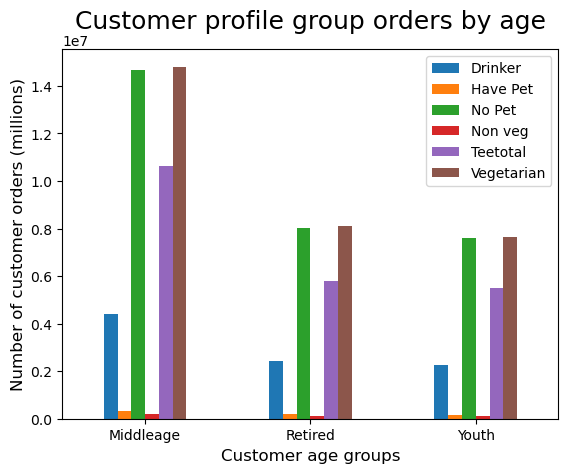

In [118]:
# Create bar chart
bar_age_department = df_age_departments.plot.bar(rot=0)
bar_age_department.legend(title=None)
plt.title('Customer profile group orders by age', fontsize = 18, pad=15)
plt.ylabel('Number of customer orders (millions)', fontsize = 12)
plt.xlabel('Customer age groups',  fontsize = 12)

__There appears to be little variance in purchases or customer behaviour by customer age group.__

In [119]:
# Export bar chart
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'), bbox_inches='tight')

## 6.2 Create visualization comparing the value of customer orders by income group

In [120]:
# Calculate the frequency customers order products by their price*

__**Note to mentor*: I tried using the mutiplication of 'prices' by 'add_to_cart_order' as a way to calculate a new variable 'purchase_value'. However this yielded negative results. I wasn't sure how else to calculate the value of customer orders to use in the analysis and so I used 'prices' and the freqency of customer purchases of products by their price as a proxy measurement for value. Any suggestions on how to create a 'order or purchase value' to use in an analysis would be appreciated__

In [121]:
# Create a crosstab
crosstab_price_by_income = pd.crosstab(df_customer_profile['prices'], df_customer_profile['income_group'], dropna = False)

In [122]:
# Check the crosstab
crosstab_price_by_income

income_group,High,Low,Middle
prices,,,
1.000000,29110,16739,63413
1.099609,58150,44139,130048
1.200195,64624,39149,138908
1.299805,103170,76710,227263
1.400391,94850,65705,214244
...,...,...,...
24.593750,573,177,1095
24.703125,1944,450,4633
24.796875,123,30,233


Text(0.5, 0, 'Prices')

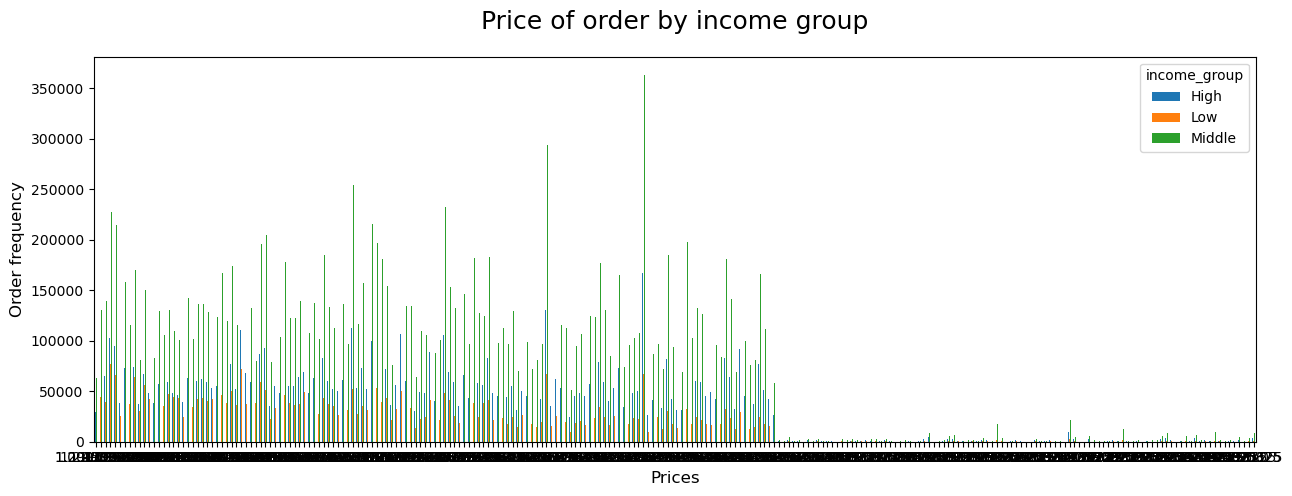

In [123]:
# Create a bar chart
bar_price_by_income = crosstab_price_by_income.plot.bar(rot=0, figsize=(15, 5))
plt.title('Price of order by income group', fontsize = 18, pad=20)
plt.ylabel('Order frequency', fontsize = 12)
plt.xlabel('Prices',  fontsize = 12)

In [124]:
# Export bar chart
bar_price_by_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_by_income.png'))

__It appears that the middle-income group makes the most number of purchases, but this is true because the represent the largest income group.  If you normalize the frequency of purchases you get a slightly different picture as below__

In [125]:
# Create a crosstab looking at the normalized frequency customers order products by their price
crosstab_price_by_income_norm = pd.crosstab(df_customer_profile['prices'], df_customer_profile['income_group'], normalize='columns', dropna = False)

In [126]:
# Check the crosstab
crosstab_price_by_income_norm

income_group,High,Low,Middle
prices,,,
1.000000,0.003518,0.003760,0.003478
1.099609,0.007028,0.009914,0.007132
1.200195,0.007811,0.008793,0.007618
1.299805,0.012469,0.017229,0.012464
1.400391,0.011464,0.014757,0.011750
...,...,...,...
24.593750,0.000069,0.000040,0.000060
24.703125,0.000235,0.000101,0.000254
24.796875,0.000015,0.000007,0.000013


Text(0.5, 0, 'Prices')

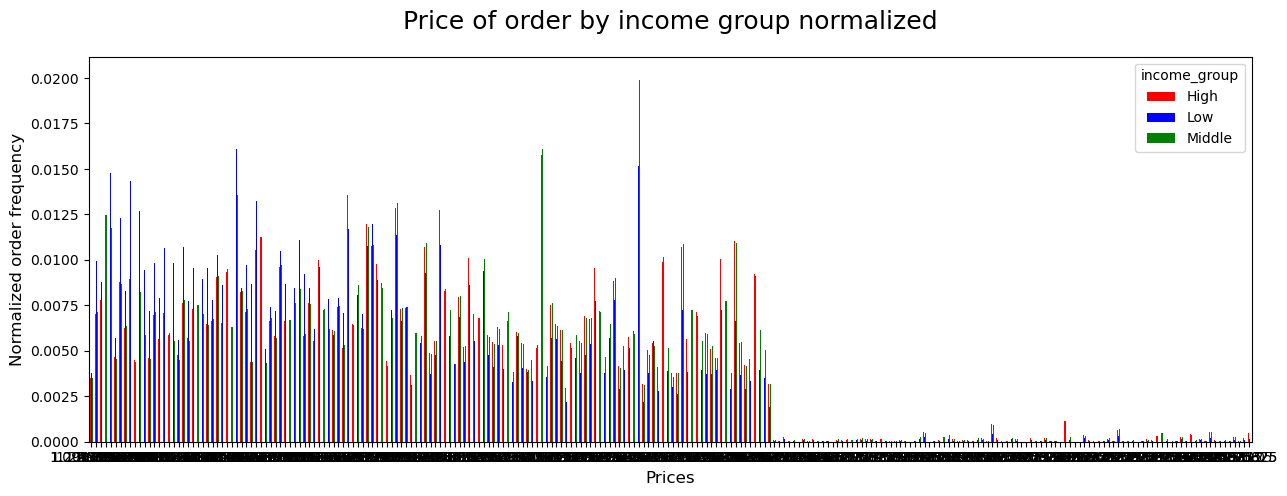

In [127]:
# Create a bar chart
bar_price_by_income_norm = crosstab_price_by_income_norm.plot.bar(rot=0, figsize=(15, 5), color=['red', 'blue', 'green'])
plt.title('Price of order by income group normalized', fontsize = 18, pad=20)
plt.ylabel('Normalized order frequency', fontsize = 12)
plt.xlabel('Prices',  fontsize = 12)

In [128]:
# Export bar chart
bar_price_by_income_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_by_income_norm.png'))

In [129]:
# Create a crosstab looking at the normalized frequency customers order products by their price
crosstab_price_range_by_income_norm = pd.crosstab(df_customer_profile['price_range'], df_customer_profile['income_group'], normalize='columns', dropna = False)

In [130]:
crosstab_price_range_by_income_norm

income_group,High,Low,Middle
price_range,,,
High-range product,0.014387,0.006607,0.013680
Low-range product,0.297528,0.394268,0.299244
Mid-range product,0.688085,0.599125,0.687076


Text(0.5, 0, 'Price range')

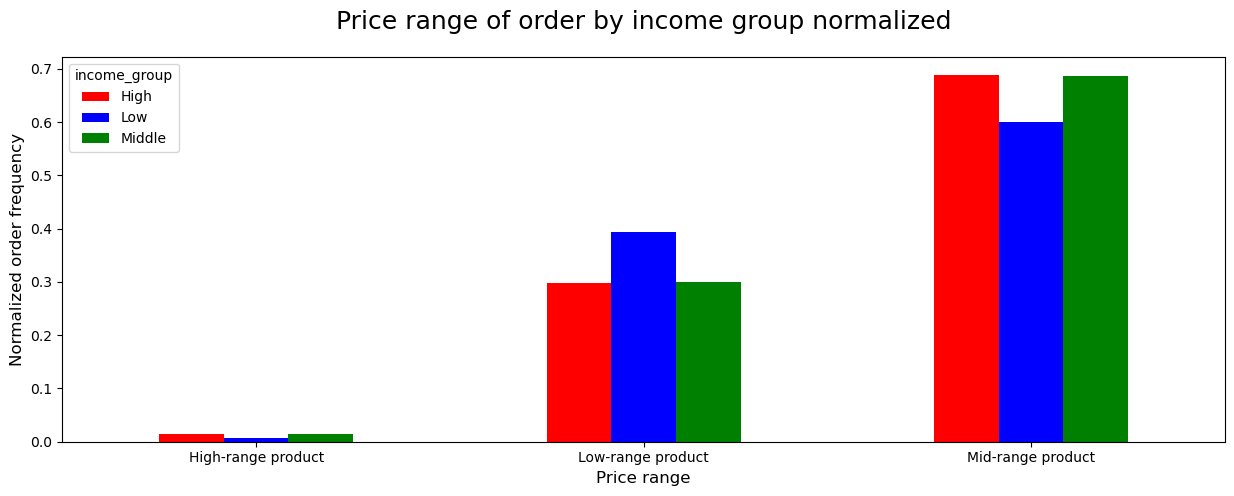

In [131]:
bar_price_range_by_income_norm = crosstab_price_range_by_income_norm.plot.bar(rot=0, figsize=(15, 5), color=['red', 'blue', 'green'])
plt.title('Price range of order by income group normalized', fontsize = 18, pad=20)
plt.ylabel('Normalized order frequency', fontsize = 12)
plt.xlabel('Price range',  fontsize = 12)

In [132]:
# Export bar chart
bar_price_range_by_income_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_by_income_norm.png'))

__The normalized number of purchases for each product price level by income group shows a more nuanced view. The 'Low income' group makes the most purchases of lower priced products relative to the other two groups. For-mid priced products the 'High' and 'Middle' income groups make the most purchases but without a lot of difference from the 'Low income' group.  There are very few purchases from the 'High' price range' products. If marketing wants to target when fewer orders are being made they might want to look at customer groups that are purchasing less (eg. 'High income) or products that are being purchased less, such as the 'High-range' products that Instacart would want the to target the'High' and 'Middle' income groups with.__

## 6.3 Create visualization for orders from family units by days of the week

([<matplotlib.axis.XTick at 0x352b46cd0>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

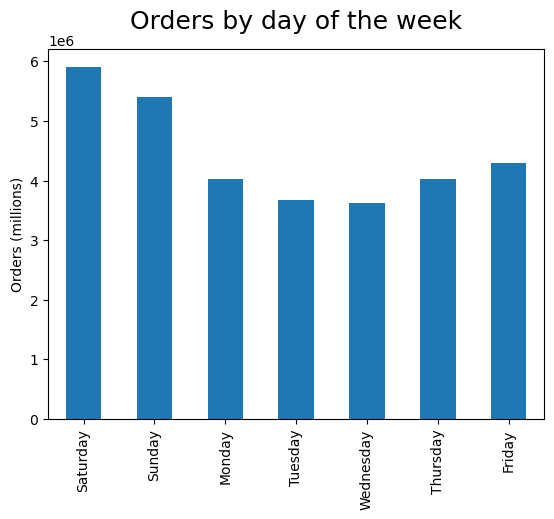

In [133]:
# Print bar chart for all orders by day of the week for comparison
bar_orders_day = df_customer_profile['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Orders by day of the week', fontsize = 18, pad=15)
plt.ylabel('Orders (millions)')
plt.xlabel(None)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

In [134]:
# Export bar chart for orders by day of the week
bar_orders_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day.png'), bbox_inches='tight')

In [135]:
# Create a crosstab looking at 'family_unit' and 'order_days_of_week'
crosstab_family_unit_by_day = pd.crosstab(df_customer_profile['orders_day_of_week'], df_customer_profile['family_unit'], dropna = False)

In [136]:
# Check the crosstab results
crosstab_family_unit_by_day

family_unit,Married with kids,Mixed family,Single with kids,"Single, no kids"
orders_day_of_week,,,,
0,4150704,280828,502506,974572
1,3789854,259482,459198,903152
2,2829759,192366,343839,658742
3,2578075,174418,315320,601722
4,2546521,173214,306704,598555
5,2824095,195460,348434,665740
6,3024703,205404,369270,691927


([<matplotlib.axis.XTick at 0x352c0bd30>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

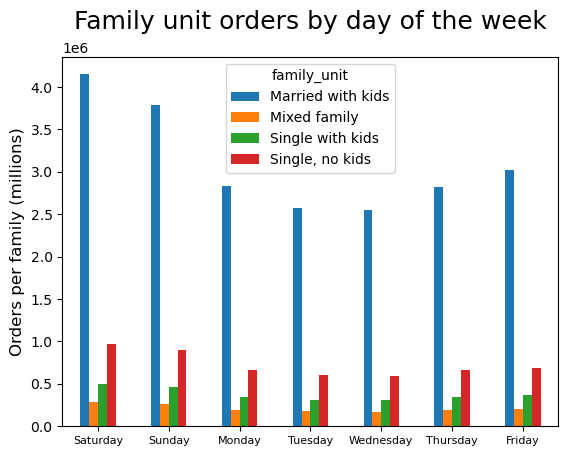

In [137]:
# Create bar chart and rename days of the week using the day of the week key from the BRD 
bar_family_unit_by_day = crosstab_family_unit_by_day.plot.bar(rot=0)
plt.title('Family unit orders by day of the week', fontsize = 18, pad=20)
plt.ylabel('Orders per family (millions)', fontsize = 12)
plt.xlabel(None)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], fontsize = 8)

In [138]:
# Export chart
bar_family_unit_by_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_unit_by_day.png'))

__While weekend/weekday purchasing between family groups do follow similar patterns - more orders on weekends - there are some interesting insights that could be looked at further for targeted marketing.  For single parents, the drop-off in mid-week shopping is not as pronounced as for the other family groups - perhaps single parents using school hours to do the shopping.__

## 6.4 Create a visualization for products ordered most frequently on weekends

In [139]:
# Create a list containing days on the weekend
result = []

for value in df_customer_profile['orders_day_of_week']:
    if value == 0:
        result.append('Weekend')
    elif value == 1:
        result.append('Weekend')
    else:
        result.append('Weekday')

In [140]:
# Check result
result

['Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekend',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekday',
 'Weekend',
 'Weekday',
 'Weekday',
 'We

In [141]:
# Create a crosstab looking at orders by products and weekend/weekday orders
crosstab_weekend_order_by_department = pd.crosstab(df_customer_profile['department'], result, dropna = False)

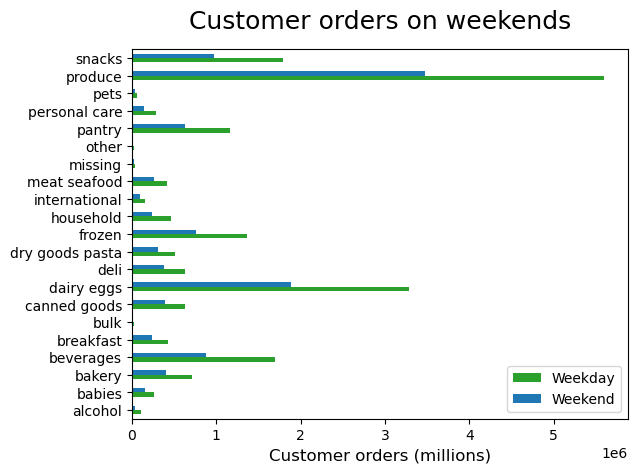

In [142]:
# Create a bar chart for weekend/weekday orders by department
bar_weekend_order_by_department = crosstab_weekend_order_by_department.plot.barh( rot=0, color = ['tab:green', 'tab:blue', 'tab:cyan', 'tab:gray'])
bar_weekend_order_by_department.legend(title='')
plt.title('Customer orders on weekends', fontsize = 18, pad=15)
plt.ylabel(None)
plt.xlabel('Customer orders (millions)', fontsize = 12)
# Export bar chart
bar_weekend_order_by_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_weekend_orders.png'), bbox_inches='tight')

__Many departments sell more on the weekend then during the other 5 days of the week. Marketing to get consumers to order more during low order periods could be made for week days.__  
__However, as will be seen in section 6.6, the meat and seafood department has some of the most expensive products and as more orders take place on the weekend, this would be useful for targeting marketing as well (perhaps encouraging orders for Friday to prepare for BBQs etc on the weekend).__

## 6.5 Create visualization for orders by hour of day

Text(0.5, 0, 'Time of day (24hrs)')

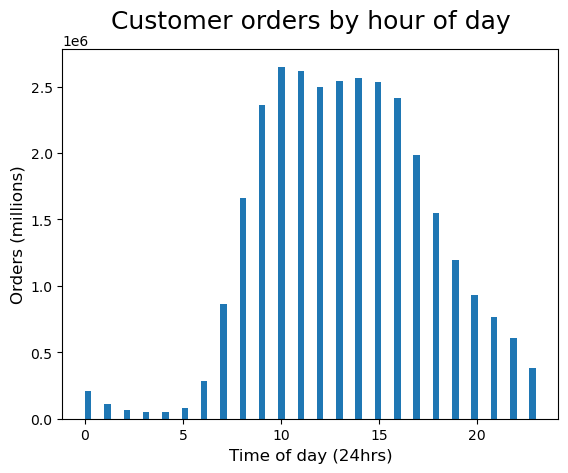

In [143]:
# Create histogram for frequency of orders by the hours of the day
hist_order_by_hour = df_customer_profile['order_hour_of_day'].plot.hist(bins = 70)
plt.title('Customer orders by hour of day', fontsize = 18, pad=15)
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel('Time of day (24hrs)', fontsize = 12)

In [144]:
# Export histogram
hist_order_by_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_by_hour.png'), bbox_inches='tight')

([<matplotlib.axis.XTick at 0x2906998b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

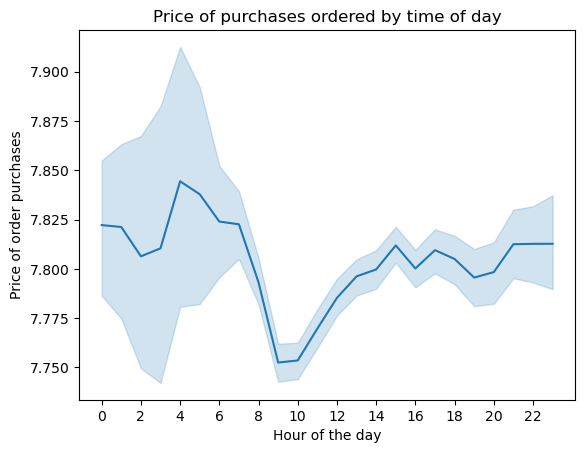

In [145]:
# Investigate if customers purchase more expensive items during certain times of the day
# Create a line chart of 'prices' and 'order_hour_of_day' using the small dataframe (30% sample) created in 6.2
line = sns.lineplot(data = df_customer_profile_sample, x = 'order_hour_of_day',y = 'prices')
plt.title('Price of purchases ordered by time of day')
plt.ylabel('Price of order purchases')
plt.xlabel('Hour of the day')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])

In [146]:
# Export the line chart
line_item_price_by_hour = line
line_item_price_by_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_item_price_by_hour.png'))

## 6.6 Create visualization for vegetarian and non-vegetarian customers

Text(0.5, 1.0, 'Vegetarian customers')

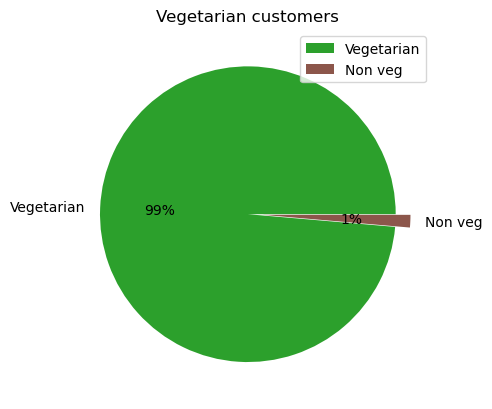

In [147]:
# Create the pie chart for veg and non-veg customers
pie_vegetarian = df_customer_profile['vegetarian'].value_counts().plot.pie(labels = ['Vegetarian','Non veg'], autopct=('%1.f%%'), colors = ['tab:green', 'tab:brown'], label = '', explode = [0,0.1])
pie_vegetarian.legend(loc = 'upper right')
plt.title('Vegetarian customers')

__As the general population in the United States is not 99% vegetarian, this suggests that customers purchase their meat and seafood from another provider.  This insight might lead Instacart to rethink the focus onproviding meat and seafood and focusing instead on providing more vegetarian alternative. However, this require more information and analysis. One, this assumes that there is no meat in the 'deli' or 'frozen' departments. This would need to be clarified with the client, Instacart, but for the purposes of this analysis I will assume they do not.__  

__Also, from 6.9 below, even though the majority of customeres do not make orders for 'meat and seafood' those that do create a lot of orders so it provides a high source of revenue even if from a small group of customers. This can be explored further__

In [148]:
# Create a crosstab comparing the prices for 'meat and seafood' against 'produce', 'dairy and eggs', 'snacks', and 'frozen'
# Create a non-veg department list
departments_to_check = ['produce', 'dairy and eggs', 'snacks', 'frozen']                      
crosstab_veg_product_prices = pd.crosstab(df_customer_profile['prices'], df_customer_profile['department'].isin(departments_to_check), dropna = False)

In [149]:
# Check cross-tab
crosstab_veg_product_prices

department,False,True
prices,,
1.000000,51167,58095
1.099609,104387,127950
1.200195,144779,97902
1.299805,184578,222565
1.400391,140388,234411
...,...,...
24.593750,1845,0
24.703125,7027,0
24.796875,386,0


In [150]:
crosstab_veg_product_prices.tail(25)

department,False,True
prices,,
22.593750,2125,0
22.703125,96,0
22.796875,1044,0
22.906250,3621,0
23.000000,3077,0
23.093750,8677,0
23.203125,14120,0
23.296875,4536,0
23.406250,338,0


In [151]:
# Create crosstab for meat and seafood product prices
departments_to_check2 = ['meat seafood']
crosstab_nonveg_product_prices = pd.crosstab(df_customer_profile['prices'], df_customer_profile['department'].isin(departments_to_check2), dropna = False)

In [152]:
crosstab_nonveg_product_prices

department,False,True
prices,,
1.000000,109262,0
1.099609,232337,0
1.200195,242681,0
1.299805,407143,0
1.400391,374799,0
...,...,...
24.593750,0,1845
24.703125,0,7027
24.796875,0,386


In [153]:
crosstab_nonveg_product_prices.tail(25)

department,False,True
prices,,
22.593750,0,2125
22.703125,0,96
22.796875,0,1044
22.906250,0,3621
23.000000,0,3077
23.093750,0,8677
23.203125,0,14120
23.296875,0,4536
23.406250,0,338


__Here we can see that a group of non-vegetarian food departments have no products in the top 25 prices, whereas meat and seafood has a large number of items in the top 25 product prices. This tweaks the veg/non-veg insight to show that while only a small customer group orders meat and seafoor from Instacart it is a very valuable one. This can be looked at further in Step 8 below.__

## 6.7 Create visualization for customers who purchase alcohol

Text(0.5, 1.0, 'Customers who buy alcohol')

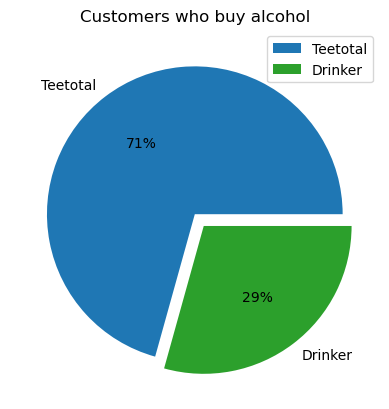

In [154]:
# Create the pie chart
pie_alcohol = df_customer_profile['alcohol'].value_counts().plot.pie(labels = ['Teetotal','Drinker'], autopct=('%1.f%%'), colors = ['tab:blue', 'tab:green'], label = '', explode = [0,0.1])
pie_alcohol.legend(loc = 'upper right')
plt.title('Customers who buy alcohol')

## 6.8 Create a visualization for customers who buy pet products

In [155]:
# Create a cross-tab comparing customers who buy pet products with family units.
crosstab_pets_family_unit = pd.crosstab(df_customer_profile['family_unit'], df_customer_profile['pets'], dropna = True)

In [156]:
# Check crosstab
crosstab_pets_family_unit

pets,Have Pet,No Pet
family_unit,,
Married with kids,495150,21248561
Mixed family,33349,1447823
Single with kids,58446,2586825
"Single, no kids",112912,4981498


Text(0.5, 0, '')

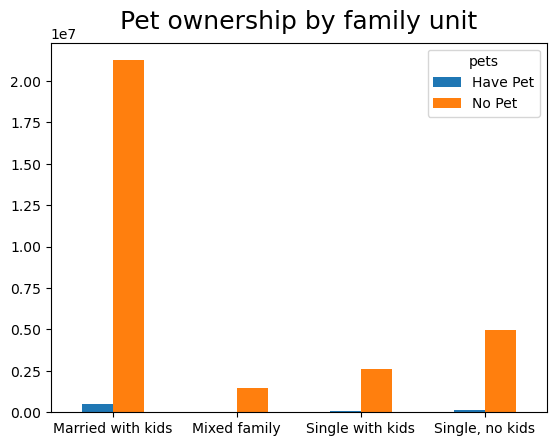

In [157]:
# Create a bar chart comparing pet ownership across the different family units
bar_pets_family_unit = crosstab_pets_family_unit.plot.bar(rot=0)
plt.title('Pet ownership by family unit', fontsize = 18, pad=10)
plt.ylabel(None)
plt.xlabel(None)

In [158]:
# Add a filter to the cross tab so only families with a pet are returned
pet_filter = ['Have Pet']
crosstab_pets_family_unit = pd.crosstab(df_customer_profile['family_unit'], df_customer_profile['pets'].isin(pet_filter), dropna = True)

Text(0.5, 1.0, '% of family groups with pets')

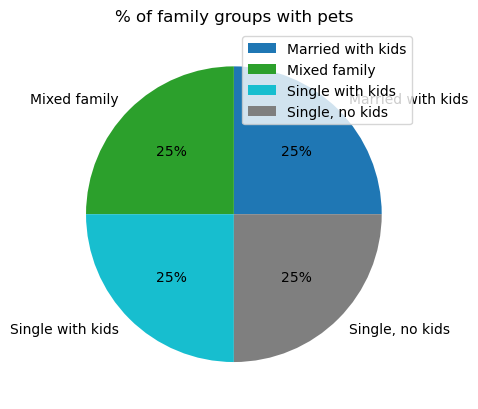

In [159]:
# Create pie chart showing families that have pets by family unit
pie_pet_family = crosstab_pets_family_unit.value_counts(dropna = False).plot.pie(labels = ['Married with kids','Mixed family', 'Single with kids', 'Single, no kids'], autopct=('%1.f%%'), colors = ['tab:blue', 'tab:green', 'tab:cyan', 'tab:gray'], label = '')
pie_pet_family.legend(loc = 'upper right')
plt.title('% of family groups with pets')

__* Note to mentor: I was trying to create a pie chart for only the 'Have Pet' values for the pet flag, but I could not find a way to do this. I would appreciate any guidance on how to adjust the arguments in the pie chart command to be able to do this?__  
__The visualisation above shows the results of my attempt, but is obviously incorrect and would not be included for any presentation or result.__


## 6.9 Create visualization for customer orders by department using a bar chart

Text(0.5, 0, '')

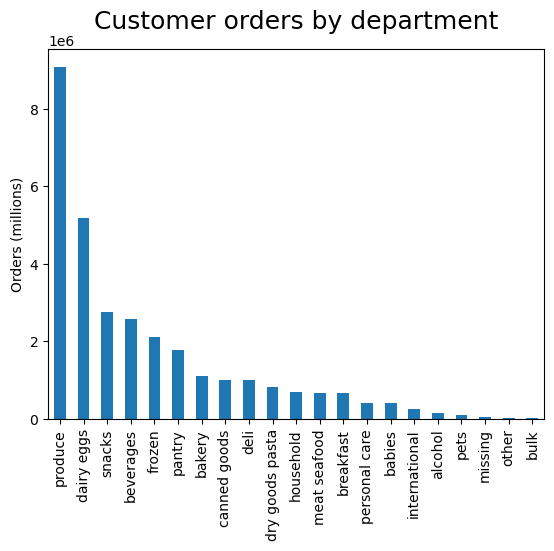

In [160]:
# Create a bar chart
bar_order_by_department = df_customer_profile['department'].value_counts().plot.bar()
plt.title('Customer orders by department', fontsize=18, pad=15)
plt.ylabel('Orders (millions)')
plt.xlabel(None)

In [161]:
# Export bar chart
bar_order_by_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_by_department.png'), bbox_inches='tight')

__The top 5 departments for orders are: produce, dairy eggs, snacks, beverages, and frozen__

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure (Task 4.10 Part 1 Step 7)

In [162]:
# 'age_group' expedenditure aggregation by prices
df_customer_profile.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
age_group                     
Middleage  7.789062  1.0  25.0
Retired    7.796875  1.0  25.0
Youth      7.785156  1.0  25.0

In [163]:
# 'age_group' expedenditure aggregation by number of orders
df_customer_profile.groupby('age_group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                  mean min max
age_group                     
Middleage    17.904057   1  99
Retired      17.784952   1  99
Youth        17.750814   1  99

In [164]:
# 'age_group' frequency aggregation by order frequency
# df_customer_profile.groupby('age_group').agg({'order_frequency': ['mean', 'min', 'max']})

__Originally, I intended to use 'order_frequency' as a metric for aggregating customer order frequency, but I found that running this aggregation caused my system to hang and the command was never successfully run.  I have surmised that this might happen as a group by aggregation for the 'order_frequency' variable must be run on a smaller sample rather than the entire dataframe, but I am not sure why this is.  For now, I have dropped it from my analysis for this task as I try to explore this further__

In [165]:
# 'age_group' frequency aggregation by days since prior order
df_customer_profile.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
age_group                                  
Middleage              10.820312  0.0  30.0
Retired                10.812500  0.0  30.0
Youth                  10.859375  0.0  30.0

In [166]:
# 'income_group' expedenditure aggregation by prices
df_customer_profile.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_group                     
High          7.949219  1.0  25.0
Low           6.914062  1.0  25.0
Middle        7.929688  1.0  25.0

In [167]:
# 'income_group' expedenditure aggregation by number of orders
df_customer_profile.groupby('income_group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                     mean min max
income_group                     
High            17.922180   1  99
Low             16.994771   1  99
Middle          17.999129   1  99

In [168]:
# 'income_group' frequency aggregation by order frequency
#df_customer_profile.groupby('income_group').agg({'order_frequency': ['mean', 'min', 'max']})

In [169]:
# 'income_group' frequency aggregation by days since prior order
df_customer_profile.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
High                      10.773438  0.0  30.0
Low                       11.132812  0.0  30.0
Middle                    10.773438  0.0  30.0

In [170]:
# 'family unit' expedenditure aggregation by prices
df_customer_profile.groupby('family_unit').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
family_unit                           
Married with kids  7.789062  1.0  25.0
Mixed family       7.800781  1.0  25.0
Single with kids   7.800781  1.0  25.0
Single, no kids    7.785156  1.0  25.0

In [171]:
# 'family unit' expedenditure aggregation by number of orders
df_customer_profile.groupby('family_unit').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                          mean min max
family_unit                           
Married with kids    17.778735   1  99
Mixed family         18.000712   1  99
Single with kids     17.993361   1  99
Single, no kids      17.939521   1  99

In [172]:
# 'family unit' frequency aggregation by order frequency
#df_customer_profile.groupby('family_unit').agg({'order_frequency': ['mean', 'min', 'max']})

In [173]:
# 'family unit' frequency aggregation by days since prior order
df_customer_profile.groupby('family_unit').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
family_unit                                        
Married with kids              10.835938  0.0  30.0
Mixed family                   10.773438  0.0  30.0
Single with kids               10.765625  0.0  30.0
Single, no kids                10.828125  0.0  30.0

In [174]:
# expedenditure aggregation by number of orders for days of the week
df_customer_profile.groupby('orders_day_of_week').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
orders_day_of_week                     
0                   7.859375  1.0  25.0
1                   7.757812  1.0  25.0
2                   7.753906  1.0  25.0
3                   7.757812  1.0  25.0
4                   7.757812  1.0  25.0
5                   7.761719  1.0  25.0
6                   7.859375  1.0  25.0

In [175]:
# expedenditure aggregation order number for days of the week
df_customer_profile.groupby('orders_day_of_week').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                           mean min max
orders_day_of_week                     
0                     16.703004   1  99
1                     18.000968   1  99
2                     17.990077   1  99
3                     18.445958   1  99
4                     18.687535   1  99
5                     18.654912   1  99
6                     17.019389   1  99

In [176]:
# frequency aggregation by order frequency for days of the week
#df_customer_profile.groupby('orders_day_of_week').agg({'order_frequency': ['mean', 'min', 'max']})

In [177]:
# expedenditure aggregation by prices for hours of the day
df_customer_profile.groupby('order_hour_of_day').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
order_hour_of_day                     
0                  7.812500  1.0  25.0
1                  7.804688  1.0  25.0
2                  7.804688  1.0  25.0
3                  7.828125  1.0  25.0
4                  7.843750  1.0  25.0
5                  7.832031  1.0  25.0
6                  7.820312  1.0  25.0
7                  7.820312  1.0  25.0
8                  7.789062  1.0  25.0
9                  7.750000  1.0  25.0
10                 7.750000  1.0  25.0
11                 7.769531  1.0  25.0
12                 7.789062  1.0  25.0
13                 7.792969  1.0  25.0
14                 7.800781  1.0  25.0
15                 7.804688  1.0  25.0
16                 7.800781  1.0  25.0
17                 7.808594  1.0  25.0
18                 7.808594  1.0  25.0
19                 7.792969  1.0  25.0
20                 7.800781  1.0  25.0
21                 7.804688  1.0  25.0
22                 7.816406  1.0  25.0
23                 7.796875  1.0  25.0

In [178]:
# expedenditure aggregation by order number for hours of the day
df_customer_profile.groupby('order_hour_of_day').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                          mean min max
order_hour_of_day                     
0                    16.498303   1  99
1                    16.116948   1  99
2                    16.499566   1  99
3                    16.982581   1  99
4                    17.731379   1  99
5                    18.977398   1  99
6                    20.141150   1  99
7                    20.297659   1  99
8                    19.749835   1  99
9                    19.280366   1  99
10                   18.571575   1  99
11                   17.938463   1  99
12                   17.642534   1  99
13                   17.651658   1  99
14                   17.596988   1  99
15                   17.442658   1  99
16                   17.055619   1  99
17                   16.757403   1  99
18                   16.414565   1  99
19                   16.625896   1  99
20                   17.192302   1  99
21                   17.841328   1  99
22                   17.651226   1  99
23                   17.340813   1  99

In [179]:
# frequency aggregation by order frequency for hours of the day
#df_customer_profile.groupby('orders_hour_of_day').agg({'order_frequency': ['mean', 'min', 'max']})

In [180]:
# 'vegetarian' expedenditure aggregation by prices
df_customer_profile.groupby('vegetarian').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
vegetarian                     
Non veg     8.000000  1.0  15.0
Vegetarian  7.789062  1.0  25.0

In [181]:
# 'vegetarian' expedenditure aggregation by number of orders
df_customer_profile.groupby('vegetarian').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                   mean min max
vegetarian                     
Non veg       16.933392   1  99
Vegetarian    17.846656   1  99

In [182]:
# 'vegetarian' frequency aggregation by order frequency
#df_customer_profile.groupby('vegetarian').agg({'order_frequency': ['mean', 'min', 'max']})

In [183]:
# 'vegetarian' frequency aggregation by days since prior order
df_customer_profile.groupby('vegetarian').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                             mean  min   max
vegetarian                                  
Non veg                 11.250000  0.0  30.0
Vegetarian              10.820312  0.0  30.0

In [184]:
# 'alcohol' expedenditure aggregation by prices
df_customer_profile.groupby('alcohol').agg({'prices': ['mean', 'min', 'max']})

prices           
              mean  min   max
alcohol                      
Drinker   7.980469  1.0  15.0
Teetotal  7.710938  1.0  25.0

In [185]:
# 'alcohol' expedenditure aggregation by number of orders
df_customer_profile.groupby('alcohol').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                 mean min max
alcohol                      
Drinker     18.495730   1  99
Teetotal    17.559677   1  99

In [186]:
# 'alcohol' frequency aggregation by order frequency
#df_customer_profile.groupby('alcohol').agg({'order_frequency': ['mean', 'min', 'max']})

In [187]:
# 'alcohol' frequency aggregation by days since prior order
df_customer_profile.groupby('alcohol').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                           mean  min   max
alcohol                                   
Drinker               10.601562  0.0  30.0
Teetotal              10.921875  0.0  30.0

In [188]:
# 'pets' expedenditure aggregation by prices
df_customer_profile.groupby('pets').agg({'prices': ['mean', 'min', 'max']})

prices           
              mean  min   max
pets                         
Have Pet  7.378906  1.0  15.0
No Pet    7.800781  1.0  25.0

In [189]:
# 'pets' expedenditure aggregation by number of orders
df_customer_profile.groupby('pets').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                 mean min max
pets                         
Have Pet    16.438914   1  99
No Pet      17.866405   1  99

In [190]:
# 'pets' frequency aggregation by order frequency
#df_customer_profile.groupby('pets').agg({'order_frequency': ['mean', 'min', 'max']})

In [191]:
# 'pets' frequency aggregation by days since prior order
df_customer_profile.groupby('pets').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                           mean  min   max
pets                                      
Have Pet              11.617188  0.0  30.0
No Pet                10.804688  0.0  30.0

In [192]:
# 'department' expedenditure aggregation by prices
df_customer_profile.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices                     
                      mean       min        max
department                                     
alcohol           8.148438  1.000000  15.000000
babies            7.632812  1.000000  15.000000
bakery            7.855469  1.000000  15.000000
beverages         7.683594  1.000000  15.000000
breakfast         8.031250  1.000000  14.898438
bulk              8.343750  1.400391  14.101562
canned goods      7.546875  1.000000  15.000000
dairy eggs        8.335938  1.000000  15.000000
deli              7.781250  1.000000  15.000000
dry goods pasta   7.347656  1.000000  15.000000
frozen            7.734375  1.000000  15.000000
household         7.378906  1.000000  15.000000
international     7.679688  1.000000  15.000000
meat seafood     16.296875  8.000000  25.000000
missing           8.664062  1.000000  15.000000
other             6.960938  1.099609  15.000000
pantry            8.015625  1.000000  20.000000
personal care     8.000000  1.000000  15.000000
pets              7.886719  1.000000  15.000000
produce           7.980469  1.000000  15.000000
snacks            4.277344  1.599609   7.000000

In [193]:
# 'department' expedenditure aggregation by number of orders
df_customer_profile.groupby('department').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                        mean min max
department                          
alcohol            16.034226   1  99
babies             19.867090   1  99
bakery             17.856619   1  99
beverages          17.901479   1  99
breakfast          17.469987   1  99
bulk               20.797555   1  99
canned goods       16.933858   1  99
dairy eggs         18.324695   1  99
deli               17.144802   1  99
dry goods pasta    16.633019   1  99
frozen             16.160739   1  99
household          16.438914   1  99
international      17.174694   1  99
meat seafood       16.576910   1  99
missing            24.281327   1  99
other              18.096481   1  99
pantry             17.328319   1  99
personal care      16.933392   1  99
pets               15.995927   1  99
produce            18.495730   1  99
snacks             17.830354   1  99

In [194]:
# 'department' frequency aggregation by order frequency
#df_customer_profile.groupby('department').agg({'order_frequency': ['mean', 'min', 'max']})

In [195]:
# 'department' frequency aggregation by days since prior order
df_customer_profile.groupby('department').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
department                                       
alcohol                      10.078125  0.0  30.0
babies                        9.843750  0.0  30.0
bakery                       10.828125  0.0  30.0
beverages                    10.789062  0.0  30.0
breakfast                    11.007812  0.0  30.0
bulk                          9.937500  0.0  30.0
canned goods                 11.304688  0.0  30.0
dairy eggs                   10.726562  0.0  30.0
deli                         11.054688  0.0  30.0
dry goods pasta              11.421875  0.0  30.0
frozen                       11.398438  0.0  30.0
household                    11.617188  0.0  30.0
international                10.968750  0.0  30.0
meat seafood                 11.125000  0.0  30.0
missing                       9.898438  0.0  30.0
other                        10.648438  0.0  30.0
pantry                       10.851562  0.0  30.0
personal care                11.250000  0.0  30.0
pets                         11.562500  0.0  30.0
produce                      10.601562  0.0  30.0
snacks                       10.695312  0.0  30.0

# 8. Compare customer profiles with regions and departments. Is there a link between customers behaviors across regions? (Task 4.10 Part 1 Step 8)

## 8.1 Compare profile groups for age, income, and family unit across regions

In [196]:
# Use the melt() function to compare multiple variables (customer profile groups) using the 30% sample (df_customer_profile_sample) created in section 6 as available memory for use of melt() on full dataframe results in a 'dead' kernel
cols = ['age_group', 'income_group', 'family_unit']
df_regions_profiles_sample = (df_customer_profile_sample.melt(id_vars='region', value_vars=cols).reset_index()
        .groupby([pd.Grouper(key='region'),'value'])
        .size()
        .unstack(fill_value=0))

In [197]:
# Check comparison dataframe
df_regions_profiles_sample

value,High,Low,Married with kids,Middle,Middleage,Mixed family,Retired,Single with kids,"Single, no kids",Youth
region,,,,,,,,,,
Midwest,590901,307627,1527014,1280592,1065937,105396,571990,185146,361564,541193
Northeast,441337,236822,1154636,959438,783152,76934,444800,143732,262295,409645
South,817644,453582,2169445,1824531,1498134,151974,813343,262881,511457,784280
West,633369,338013,1672280,1404612,1156472,110385,628483,201089,392240,591039


Text(0.5, 0, '')

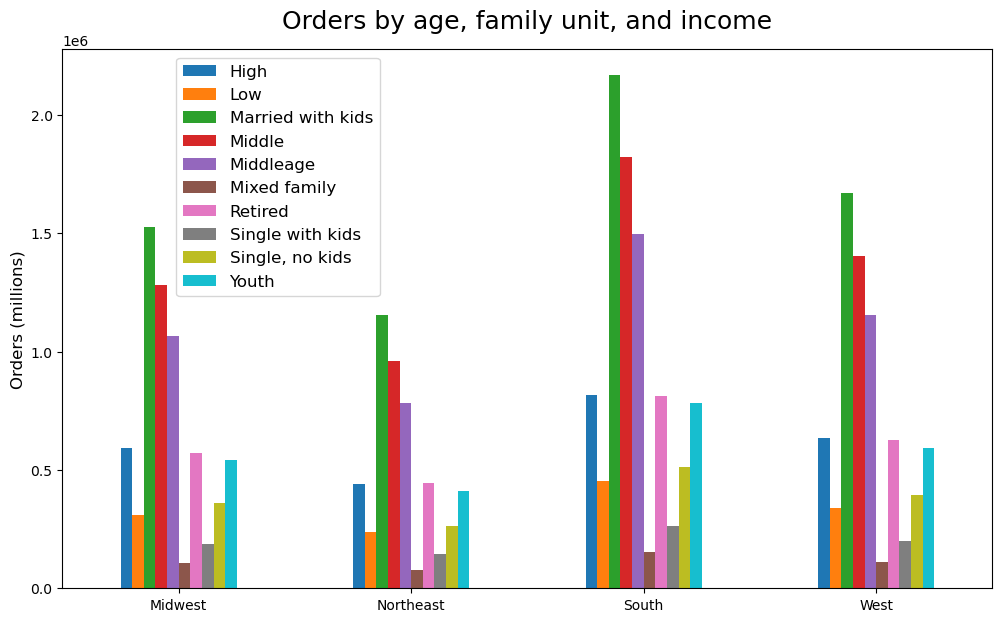

In [198]:
# Create a bar chart for the comparison dataframe
bar_regions_profiles = df_regions_profiles_sample.plot.bar(rot=0, figsize=(12,7))
columns = df_regions_profiles_sample.columns
plt.legend(columns, title = '', bbox_to_anchor=(.35, 1), loc = 'upper right', fontsize=12)
plt.title('Orders by age, family unit, and income', fontsize = 18, pad=15)
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel(None)

In [199]:
# Export bar chart
bar_regions_profiles.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_regions_profiles.png'))

__There is little variation in customer behaviour by age, income, and family unit group across regions, aside from the fact that there are more customers/ orders for all categories in the South region__

### 8.1.1 Compare customer behaviour in product purchases by age 

In [200]:
# Compare Compare customer behaviour in orders by age across regions
crosstab_age_by_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['age_group'], dropna = True)

In [201]:
# Check crosstab
crosstab_age_by_region

age_group,Middleage,Retired,Youth
region,,,
Midwest,3553953,1904046,1803514
Northeast,2612011,1484807,1367867
South,4986978,2708461,2615700
West,3858613,2098230,1970384


Text(0.5, 0, '')

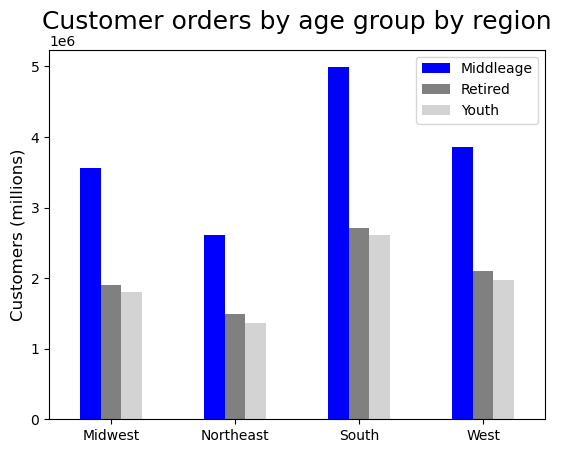

In [202]:
# Create a bar chart
bar_age_by_region = crosstab_age_by_region.plot.bar(rot=0, color=['blue', 'grey', 'lightgrey'])
bar_age_by_region.legend(title=None)
plt.title('Customer orders by age group by region', fontsize = 18, pad=15)
plt.ylabel('Customers (millions)', fontsize = 12)
plt.xlabel(None)

In [203]:
# Export bar chart
bar_age_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_by_region.png'))

## 8.2 Compare order frequency by day of the week across regions

In [204]:
# Compare order frequency by day of the week across regions
crosstab_day_by_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['orders_day_of_week'], dropna = True)

In [205]:
# Check crosstab
crosstab_day_by_region

orders_day_of_week,0,1,2,3,4,5,6
region,,,,,,,
Midwest,1390189,1263655,947370,855316,851501,943396,1010086
Northeast,1043698,954332,713159,649305,637781,716128,750282
South,1955352,1808348,1340387,1229002,1205497,1342849,1429704
West,1519371,1385351,1023790,935912,930215,1031356,1101232


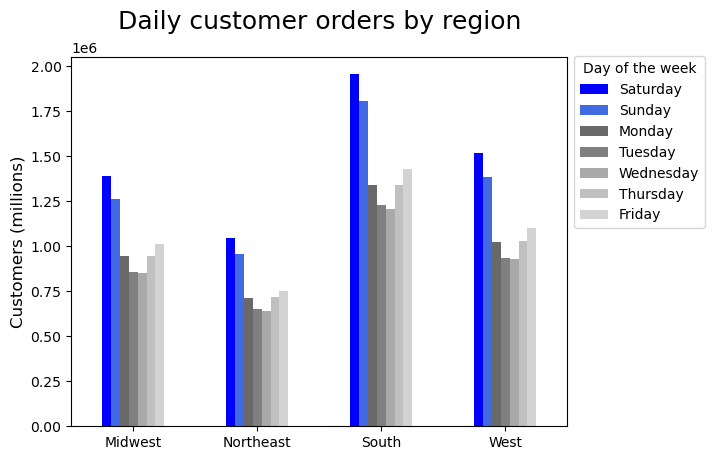

In [206]:
# Create barchart
bar_daily_orders_by_region = crosstab_day_by_region.plot.bar(rot=0, color=['blue', 'royalblue', 'dimgrey', 'grey', 'darkgrey', 'silver', 'lightgrey'])
plt.title('Daily customer orders by region', fontsize = 18, pad=20)
plt.ylabel('Customers (millions)', fontsize = 12)
plt.xlabel(None)
bar_daily_orders_by_region.legend(title = 'Day of the week', bbox_to_anchor = (1, 1.02), loc = 'upper left', labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

In [207]:
# Export bar chart
bar_daily_orders_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_daily_orders_by_region.png'))

__While the percentage of orders made by day of the week by each region matched the same pattern, there are more customers/ orders overall in the South region__

## 8.3 Compare order frequency by hour of the day across regions

In [208]:
# Create crosstab
crosstab_hour_by_region = pd.crosstab(df_customer_profile['order_hour_of_day'], df_customer_profile['region'], dropna = True)

In [209]:
# Check crosstab
crosstab_hour_by_region

region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,48192,36600,69767,53483
1,25879,20529,35769,27444
2,16136,11842,20668,17045
3,11298,8843,16458,12197
4,12015,9043,17277,12428
5,19061,14733,29571,21053
6,64885,49025,95583,71520
7,201794,154031,288357,219031
8,384854,294134,559785,420337


Text(0.5, 0, 'Hours of the day (24hrs)')

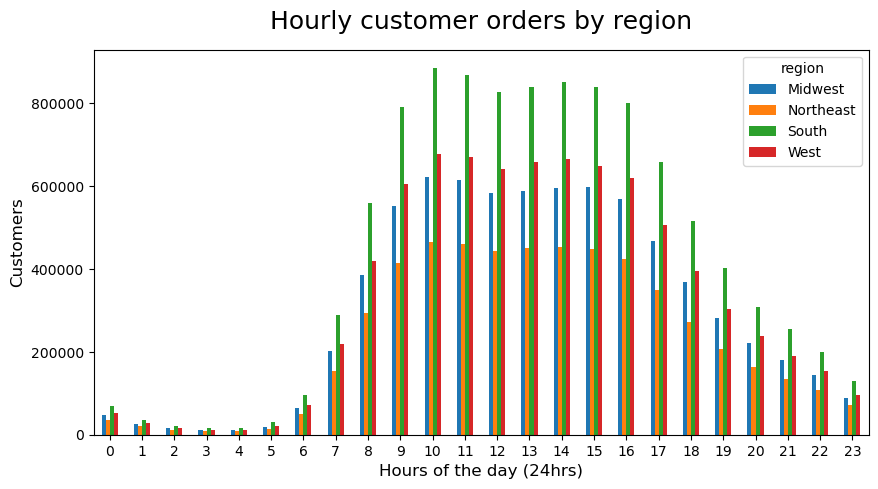

In [210]:
# Create barchart
bar_hour_by_region = crosstab_hour_by_region.plot.bar(rot=0, figsize = (10,5))
plt.title('Hourly customer orders by region', fontsize = 18, pad=15)
plt.ylabel('Customers', fontsize = 12)
plt.xlabel('Hours of the day (24hrs)', fontsize = 12) 

In [211]:
# Export bar chart
bar_hour_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour_by_region.png'), bbox_inches='tight')

## 8.4 Compare profile groups for vegetarians across regions

In [212]:
# Create a crosstab first
crosstab_vegetarians_by_region = pd.crosstab (df_customer_profile['region'], df_customer_profile['vegetarian'], dropna = False)
crosstab_vegetarians_by_region

vegetarian,Non veg,Vegetarian
region,,
Midwest,100398,7161115
Northeast,74765,5389920
South,142496,10168643
West,106647,7820580


([<matplotlib.axis.XTick at 0x290cbbc70>,
 [Text(0, 0, 'Northeast'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

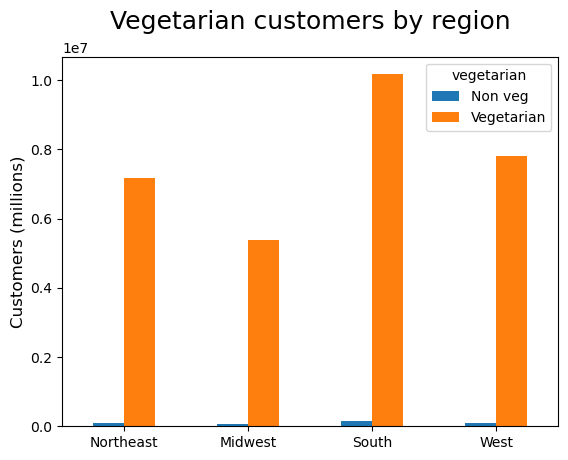

In [213]:
# Create bar chart for vegetarians by region
bar_vegetarians_by_region = crosstab_vegetarians_by_region.plot.bar(rot=0)
plt.title('Vegetarian customers by region', fontsize = 18, pad=20)
plt.ylabel('Customers (millions)', fontsize = 12)
plt.xlabel(None)
plt.xticks([0, 1, 2, 3], ['Northeast', 'Midwest', 'South', 'West'])

__Again, while the ration of vegetarian to non-vegetarian customers is largely the same across all regions, there are more customers/ orders in the South region__

## 8.5 Compare profile groups for alcohol and pet related purchases across regions

In [214]:
# With the 30% sample of the customer profile dataframe use the melt() function to compare alcohol and pet related purchases by region
cols = ['alcohol', 'pets']
df_alcohol_pets_regions_sample = (df_customer_profile_sample.melt(id_vars='region', value_vars=cols)
        .sort_index()
        .groupby([pd.Grouper(key='region'),'value'])
        .size()
        .unstack(fill_value=0))

In [215]:
# Check the dataframe subset
df_alcohol_pets_regions_sample

value,Drinker,Have Pet,No Pet,Teetotal
region,,,,
Midwest,639500,49836,2129284,1539620
Northeast,478197,37241,1600356,1159400
South,908840,68675,3027082,2186917
West,696359,53566,2322428,1679635


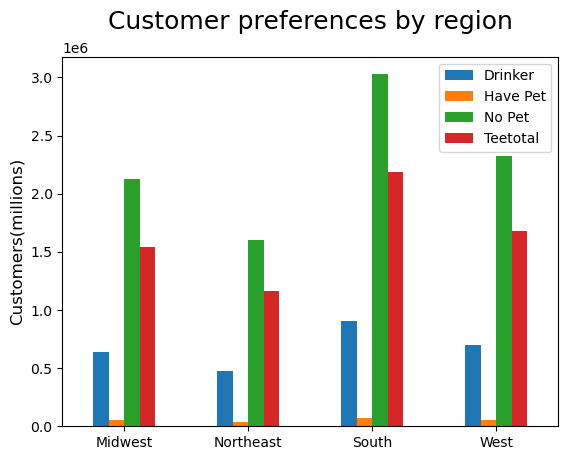

In [216]:
# Create a bar chart
bar_alcohol_pets_region_sample = df_alcohol_pets_regions_sample.plot.bar(rot=0)
plt.title('Customer preferences by region', fontsize = 18, pad=20)
plt.ylabel('Customers(millions)', fontsize = 12)
plt.xlabel(None)
bar_alcohol_pets_region_sample.legend(title=None)

__Customer preferences for alcohol or pet products is largely similar from region to region with no noticeable difference in customer behavior for these products__

## 8.6 Compare orders by department across the regions

In [217]:
# Create a crosstab to view customer orders by department across regions
crosstab_all_departments_by_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['department'], dropna = False)

In [218]:
# Check crosstab
crosstab_all_departments_by_region

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


Text(0.5, 0, '')

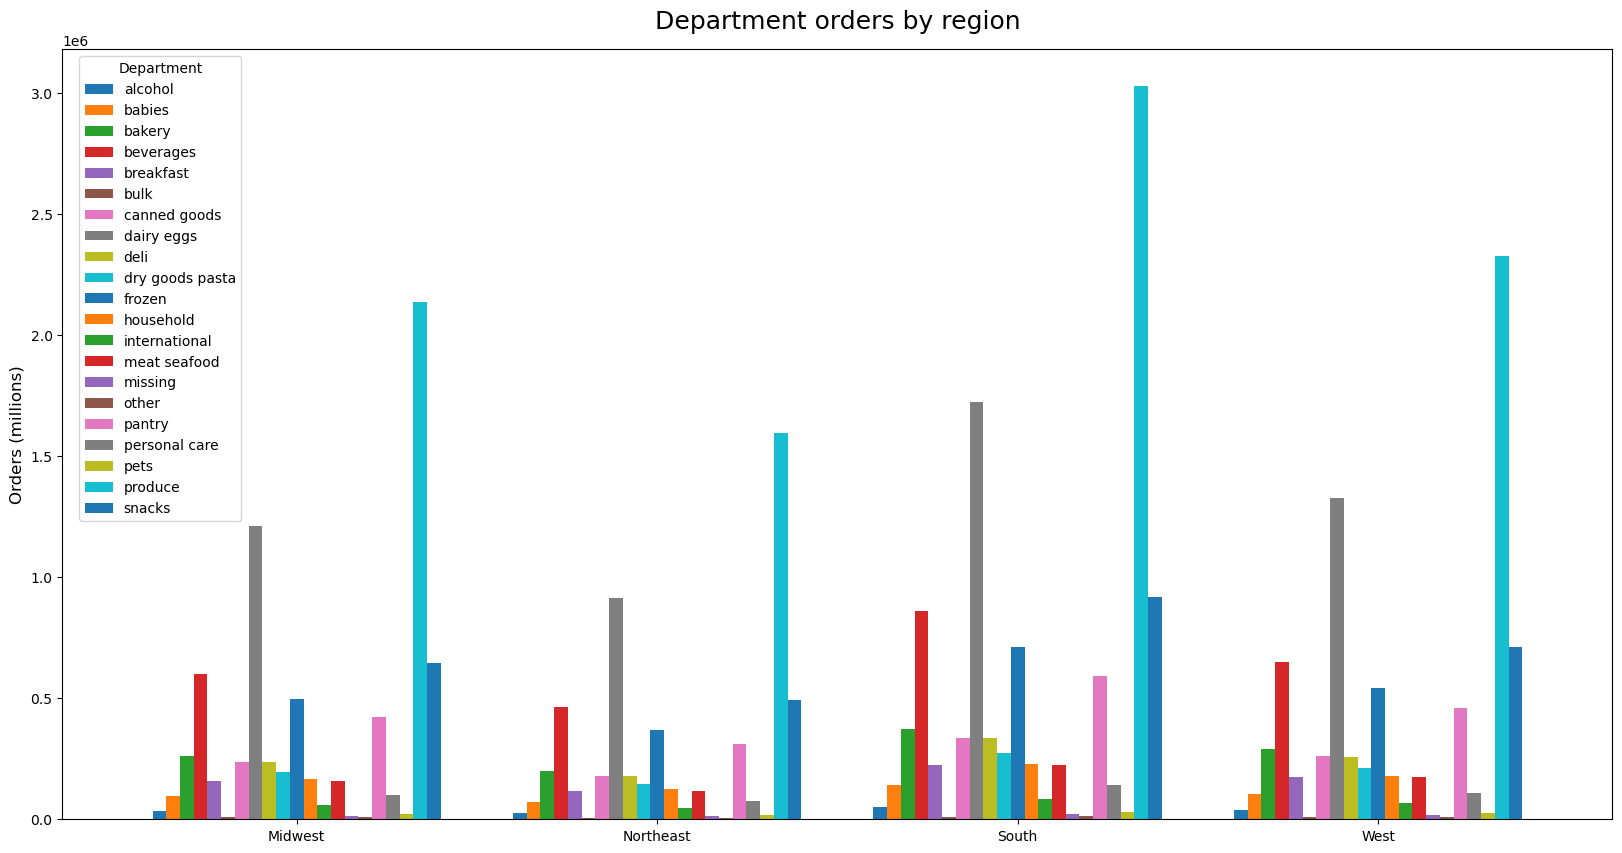

In [219]:
# Create barchart
bar_all_departments_by_region = crosstab_all_departments_by_region.plot.bar(rot=0, figsize = (20,10), width=.8)
plt.legend(title = 'Department', bbox_to_anchor=(.12, 1), loc = 'upper right')
plt.title('Department orders by region', fontsize = 18, pad=15)
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel(None)

In [220]:
# Export the chart
bar_all_departments_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_all_departments_by_region.png'))

###  8.6.1 Compare frequency of department orders by price 

In [221]:
# Create a crosstab comparing price_range and department purchases
crosstab_price_department = pd.crosstab(df_customer_profile['department'], df_customer_profile['price_range'], dropna = False)

In [222]:
# Check the crosstab
crosstab_price_department

price_range,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


In [223]:
# Export crosstab to clipboard for use in final report (Excel)
crosstab_price_department.to_clipboard()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '5'),
  Text(1, 0, '5'),
  Text(2, 0, '5'),
  Text(3, 0, '5'),
  Text(4, 0, '5'),
  Text(5, 0, '5'),
  Text(6, 0, '5'),
  Text(7, 0, '5'),
  Text(8, 0, '5'),
  Text(9, 0, '5'),
  Text(10, 0, '5'),
  Text(11, 0, '5'),
  Text(12, 0, '5'),
  Text(13, 0, '5'),
  Text(14, 0, '5'),
  Text(15, 0, '5'),
  Text(16, 0, '5'),
  Text(17, 0, '5'),
  Text(18, 0, '5'),
  Text(19, 0, '5'),
  Text(20, 0, '5')])

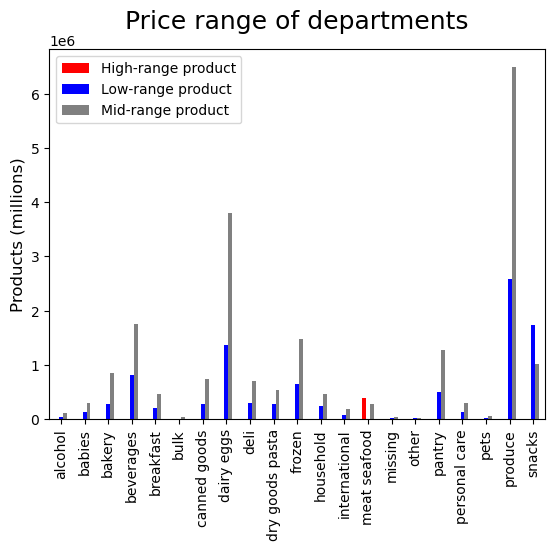

In [224]:
# Create a bar chart
bar_price_range_departments = crosstab_price_department.plot.bar(rot=90, color=['red', 'blue', 'grey'])
bar_price_range_departments.legend(title=None)
plt.title('Price range of departments', fontsize = 18, pad=15)
plt.ylabel('Products (millions)', fontsize = 12)
plt.xlabel(None)
plt.xticks(text=5)

In [225]:
# Export bar chart
bar_price_range_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_departments.png'), bbox_inches='tight')

__Exploring the insighed identified in 6.6, when comparing each department by price range, it is even clearer that the meat/seafood department has the most products in the 'High' price range. Using this information along with the day when the most meat products are currently purchased (the weekend), marketing to encourage purchases of 'meat seafood' during the week could focus on 'easy preparations for the weekend BBQ', etc.__

### 8.6.2 Compare regional customer habits by price range

In [226]:
# Compare orders for each price range across the regions
crosstab_price_range_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['price_range'], dropna = False)

In [227]:
# Check crosstab
crosstab_price_range_region

price_range,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


In [228]:
# Export crosstab to clipboard for use in final report (Excel)
crosstab_price_range_region.to_clipboard()

Text(0.5, 0, '')

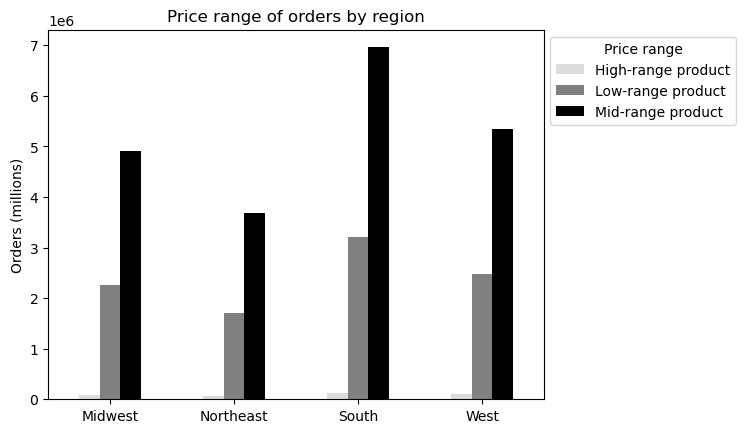

In [229]:
bar_price_range_region = crosstab_price_range_region.plot(kind='bar', rot=0, color=('gainsboro', 'grey', 'black'))
bar_price_range_region.legend(title='Price range', bbox_to_anchor=(1.4, 1), loc='upper right')
plt.title('Price range of orders by region')
plt.ylabel('Orders (millions)')
plt.xlabel(None)

Text(0.5, 0, '')

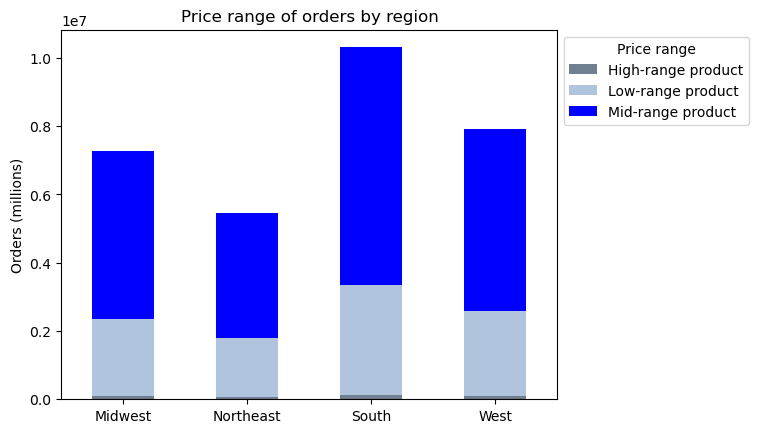

In [230]:
# Create a stacked bar chart
bar_price_range_region = crosstab_price_range_region.plot(kind='bar', stacked = True, rot=0, color=('slategrey', 'lightsteelblue', 'blue'))
bar_price_range_region.legend(title='Price range', bbox_to_anchor=(1.4, 1), loc='upper right')
plt.title('Price range of orders by region')
plt.ylabel('Orders (millions)')
plt.xlabel(None)

[Text(0, 0, '67.49%'),
 Text(0, 0, '67.39%'),
 Text(0, 0, '67.51%'),
 Text(0, 0, '67.45%')]

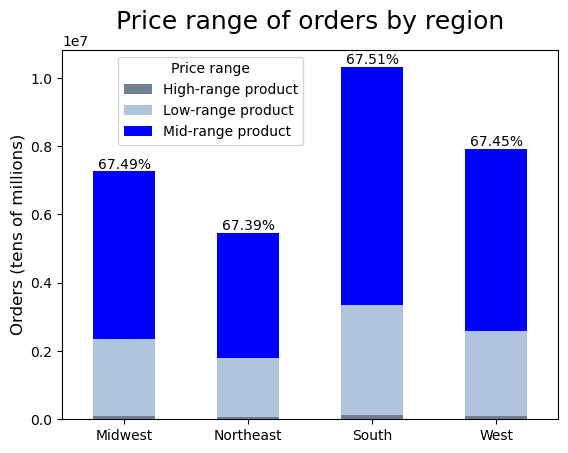

In [231]:
# Create a stacked bar chart with percentage labels
bar_price_range_region = crosstab_price_range_region.plot(kind='bar', stacked = True, rot=0, color=('slategrey', 'lightsteelblue', 'blue'))
bar_price_range_region.legend(title='Price range', bbox_to_anchor=(.5, 1), loc='upper right') #labels=['High-range product', 'Mid-range product', 'Low-range product'])
plt.title('Price range of orders by region', fontsize=18, pad=15)
plt.ylabel('Orders (tens of millions)', fontsize=12)
plt.xlabel(None)

# Add percentages to add comparisons
# Get the total for each row and then calculate the percentage
total = crosstab_price_range_region.sum(axis=1)
pct = crosstab_price_range_region.div(total, axis=0).mul(100).round(2)

# Apply to the crosstab
for z in bar_price_range_region.containers:
    label = z.get_label()
    labels = [f'{row}%' if v.get_height() > 0 else '' for v, row in zip(z, pct[(label)])]

# Apply % labels to the bars
bar_price_range_region.bar_label(z, labels=labels)

__There is very minimal differentiation in customer behavior across the regions with respect to order frequency by price range, with customers in the South region purchasing more mid-range products than the other regions__ 

__*Note to mentor*: I tried to find out how to add % labels to each container in the stacked bar chart, but everything I looked up using different methods would only provide the % lable to the top container for 'Mid-range products'. Do you have suggestions on how I can correct the code to have all containers labeled? I thought for the analysis that this would be helpful to show which region had the highest share of 'High-range products'.__

In [232]:
# Export stacked bar chart
bar_price_range_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_region.png'))

In [233]:
# Compare orders for the normalized price range across the regions
crosstab_price_range_region_norm = pd.crosstab(df_customer_profile['region'], df_customer_profile['price_range'], normalize='columns', dropna = False)

In [234]:
# Check crosstab
crosstab_price_range_region_norm

price_range,High-range product,Low-range product,Mid-range product
region,,,
Midwest,0.234400,0.234328,0.234597
Northeast,0.175227,0.176991,0.176270
South,0.333358,0.332564,0.333192
West,0.257015,0.256117,0.255941


Text(0.5, 0, '')

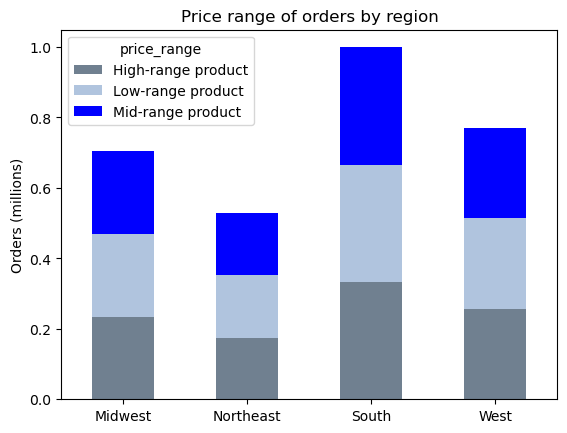

In [235]:
# Create a stacked bar chart
bar_price_range_region_norm = crosstab_price_range_region_norm.plot(kind='bar', stacked = True, rot=0, color=('slategrey', 'lightsteelblue', 'blue'))
bar_price_range_region.legend(title='Price range', bbox_to_anchor=(1.4, 1), loc='upper right')
plt.title('Price range of orders by region')
plt.ylabel('Orders (millions)')
plt.xlabel(None)

### 8.6.3 Investigate if there is any difference in when customers order products by departments by hour of the day

In [236]:
# Create crosstab to compare when orders are made during the day for each department
crosstab_ordertime_dept = pd.crosstab(df_customer_profile['order_hour_of_day'], df_customer_profile['department'])

In [237]:
# Check crosstab
crosstab_ordertime_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,465,2317,6958,16652,4131,231,6797,33150,6573,5545,...,4739,1795,4490,521,232,12950,3115,642,65073,16877
1,293,1085,3576,9518,2218,114,3655,16828,3478,2884,...,2722,961,2277,294,129,6845,1864,416,33345,8691
2,246,616,2282,5890,1318,66,2254,10162,2142,1699,...,1784,558,1465,156,113,4163,1125,247,18986,5336
3,177,457,1734,4468,1008,49,1621,7671,1537,1221,...,1353,483,1050,122,67,3049,862,252,13729,3990
4,175,534,1824,4584,1059,46,1738,7748,1578,1379,...,1530,427,1121,143,62,3109,973,269,14664,3839
5,260,1076,2967,7108,1797,75,2742,13778,2659,2059,...,2180,672,1775,180,99,4801,1397,302,25924,6372
6,645,4794,10415,22202,6546,314,8619,49797,8667,7263,...,6569,2151,6027,588,305,15367,3980,948,84649,22541
7,2021,16310,33029,66553,20865,889,25924,154902,26410,22399,...,20036,6215,18795,1792,877,46324,11700,2389,260886,70141
8,5046,28008,61396,135182,39506,1779,50974,296832,51248,41331,...,37854,12117,35620,3244,1736,90178,21953,4298,494234,145686


Text(0.5, 0, 'Hour of day (24hrs)')

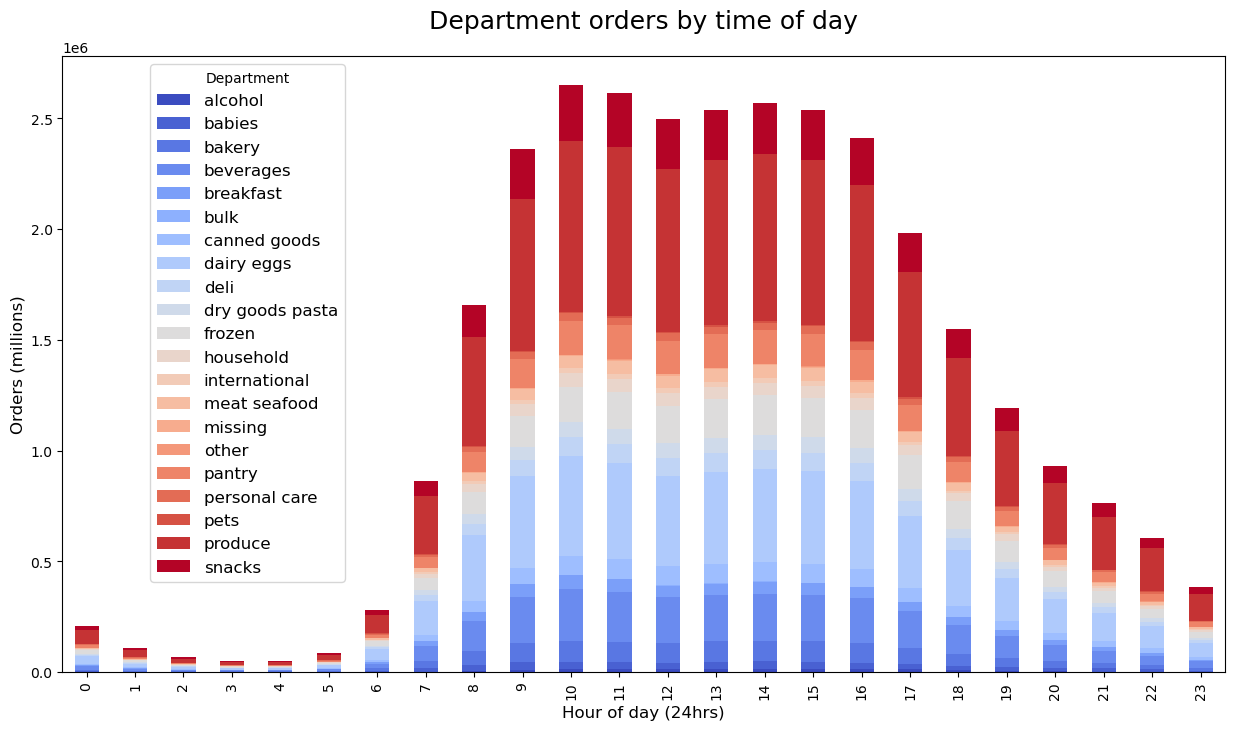

In [238]:
# Create stacked bar chart
bar_ordertime_dept = crosstab_ordertime_dept.plot(kind='bar', stacked=True, figsize=(15,8), colormap='coolwarm')
bar_ordertime_dept.legend(title='Department', bbox_to_anchor=(0.25, 1), fontsize=12)
plt.title('Department orders by time of day', fontsize=18, pad=20)
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('Hour of day (24hrs)', fontsize=12)

In [239]:
# Export the bar chart
bar_ordertime_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ordertime_dept.png'))

## 8.7 Investigate customer loyalty behaviour by region and family unit

### 8.7.1 Investigate ordering habits by customer loyalty

In [240]:
# Create crosstab for customer loyalty by region
crosstab_loyalty_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['loyalty_flag'], dropna = False)

In [241]:
# Check crosstab
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


In [242]:
crosstab_loyalty_region.to_clipboard()

[Text(0, 0, '51.66%'),
 Text(0, 0, '50.89%'),
 Text(0, 0, '51.51%'),
 Text(0, 0, '50.88%')]

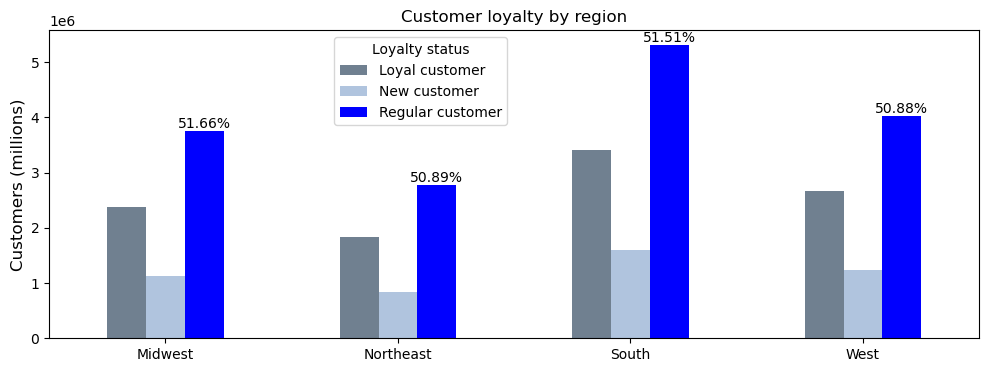

In [243]:
# Create barchart showing customer loyalty across regions
bar_loyalty_region = crosstab_loyalty_region.plot(kind='bar', stacked= False, rot=0, figsize=(12,4), color=('slategrey', 'lightsteelblue', 'blue'))
plt.legend(title='Loyalty status', bbox_to_anchor=(.5,1.0), labels=['Loyal customer', 'New customer', 'Regular customer'])
plt.title ('Customer loyalty by region', fontsize = 12)
plt.ylabel('Customers (millions)', fontsize = 12)
plt.xlabel(None)

# Add percentages to add comparisons
# Get the total for each row and then calculate the percentage
total = crosstab_loyalty_region.sum(axis=1)
pct = crosstab_loyalty_region.div(total, axis=0).mul(100).round(2)

# Apply to the crosstab
for c in bar_loyalty_region.containers:
    label = c.get_label()
    labels = [f'{row:}%'if v.get_height() >0 else f'{row:}%' for v, row in zip(c,pct[(label)])]
    #labels = [f'%{v.get_height():0.2f}' if v.get_height() > 0 else '' for v, row in zip(c, pct[(label)])]

# Apply % labels to the bars
bar_loyalty_region.bar_label(c, labels=labels, label_type='edge')

__There is very little difference in customer loyalty from region to region__

In [244]:
# Export visualization
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_region.png'))

In [245]:
# Investigate customer orders by price range and loyalty
crosstab_price_range_loyalty = pd.crosstab(df_customer_profile['price_range'], df_customer_profile['loyalty_flag'], dropna = False)

In [246]:
# Check crosstab
crosstab_price_range_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
price_range,,,
High-range product,119936,65927,212090
Low-range product,3214690,1501288,4958862
Mid-range product,6949467,3236480,10705824


Text(0.5, 0, '')

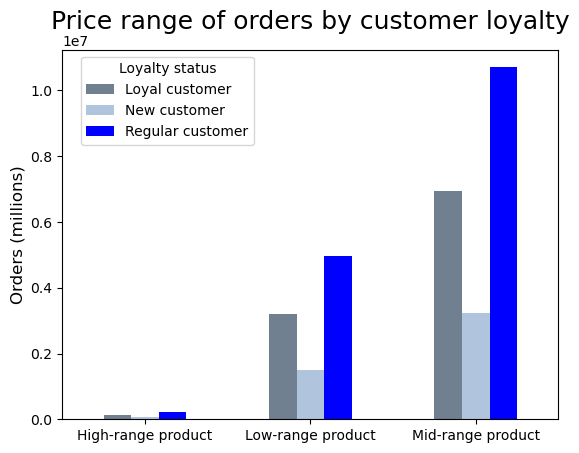

In [247]:
# Create bar chart
bar_price_range_loyalty = crosstab_price_range_loyalty.plot(kind='bar', stacked = False, rot=0, color=('slategrey', 'lightsteelblue', 'blue'))
bar_price_range_loyalty.legend(title='Loyalty status', bbox_to_anchor=(.4, 1), loc='upper right')
plt.title('Price range of orders by customer loyalty', fontsize=18, pad=15)
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel(None)

In [248]:
# Export chart
bar_price_range_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_loyalty.png'))

In [249]:
# Investigate customer orders by department and loyalty
crosstab_department_loyalty = pd.crosstab(df_customer_profile['department'], df_customer_profile['loyalty_flag'], dropna = False)

In [250]:
# Check crosstab
crosstab_department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


Text(0.5, 0, '')

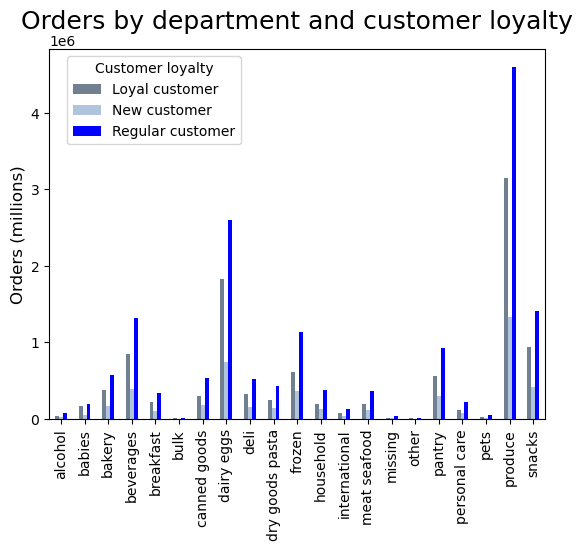

In [251]:
# Create bar chart
bar_department_loyalty = crosstab_department_loyalty.plot(kind='bar', stacked = False, rot=90, color=('slategrey', 'lightsteelblue', 'blue'))
bar_department_loyalty.legend(title='Customer loyalty', bbox_to_anchor=(.4, 1), loc='upper right')
plt.title('Orders by department and customer loyalty', fontsize=18, pad=15)
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel(None)

### 8.7.2 Investigate customer spending types by region and income

In [252]:
# Create a crosstab for regionional comparison of the spending-flag
crosstab_region_spending = pd.crosstab(df_customer_profile['region'], df_customer_profile['spending_flag'], dropna = False)

In [253]:
# Check the crosstab
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


[Text(0, 0, '97.95%'),
 Text(0, 0, '98.11%'),
 Text(0, 0, '98.07%'),
 Text(0, 0, '98.08%')]

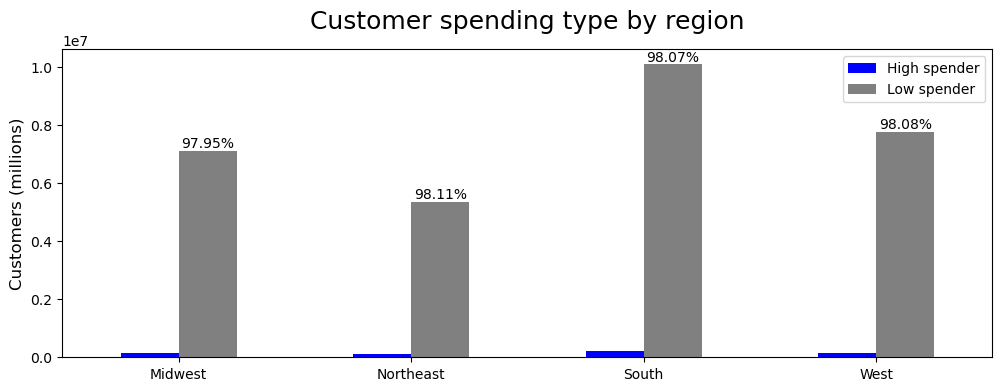

In [254]:
# Create a bar chart
bar_region_spending = crosstab_region_spending.plot(kind='bar', stacked= False, rot=0, figsize=(12,4), color=('blue', 'grey', 'black'))
plt.legend(title='', bbox_to_anchor=(1.0,1.0))
plt.title ('Customer spending type by region', fontsize = 18, pad=15)
plt.ylabel('Customers (millions)', fontsize = 12)
plt.xlabel(None)

# Add percentages to add comparisons
# Get the total for each row and then calculate the percentage
total = crosstab_region_spending.sum(axis=1)
pct = crosstab_region_spending.div(total, axis=0).mul(100).round(2)

# Apply to the crosstab
for c in bar_region_spending.containers:
    label = c.get_label()
    labels = [f'{row:}%'if v.get_height() > 0 else '' for v, row in zip(c,pct[(label)])]
    #labels = [f'%{v.get_height():0.2f}' if v.get_height() > 0 else '' for v, row in zip(c, pct[(label)])]

# Apply % labels to the bars
bar_region_spending.bar_label(c, labels=labels, label_type='edge')

In [255]:
# Export bar chart
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending.png'))

 __There is very little variance in customer spending type from region to region__

In [256]:
# Create a crosstab for comparison of spending by income
crosstab_income_spending = pd.crosstab(df_customer_profile['income_group'], df_customer_profile['spending_flag'], dropna = False)

In [257]:
# Check crosstab
crosstab_income_spending

spending_flag,High spender,Low spender
income_group,,
High,458458,7819586
Low,5121,4447267
Middle,139846,18094286


Text(0.5, 0, 'Income')

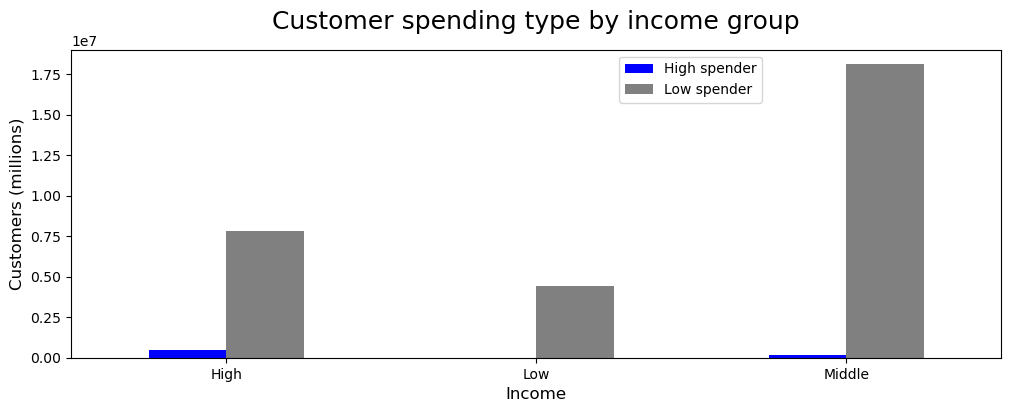

In [258]:
# Create a bar chart
bar_income_spending = crosstab_income_spending.plot(kind='bar', stacked= False, rot=0, figsize=(12,4), color=('blue', 'grey', 'black'))
plt.legend(title='', bbox_to_anchor=(.75, 1))
plt.title ('Customer spending type by income group', fontsize = 18, pad=15)
plt.ylabel('Customers (millions)', fontsize = 12)
plt.xlabel('Income', fontsize = 12)

In [259]:
# Export bar chart
bar_income_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_spending.png'))

### 8.7.3 Customer re-order frequency by region 

Text(0.5, 0, 'Days since last order')

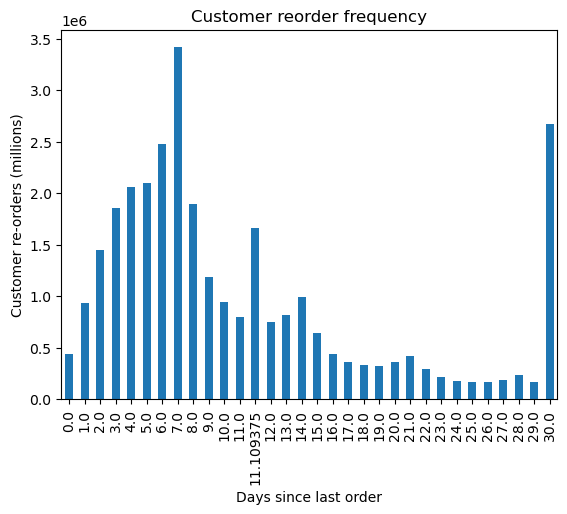

In [260]:
# Compare reorder frequency by all customers
df_customer_profile['days_since_prior_order'].value_counts().sort_index().plot.bar()
plt.title('Customer reorder frequency')
plt.ylabel('Customer re-orders (millions)')
plt.xlabel('Days since last order')

__*This has surfaced a data quality issue that I had missed until now - an error in the value entry for 'days_since_prior_order' - as 11.109375 is clearly an error. After consideration, I have decided not to retrace the analysis, treat this error through data cleaning, etc. as this is the only point in the analysis that I am considering re-order frequency.  I will instead ignore the values counted for 11.109375 and based my analysis on the other days only.__

In [261]:
# Compare reorder frequency by customer loyalty
crosstab_reorder_region = pd.crosstab(df_customer_profile['days_since_prior_order'], df_customer_profile['region'], dropna = False)

In [262]:
# Check crosstab
crosstab_reorder_region

region,Midwest,Northeast,South,West
days_since_prior_order,,,,
0.000000,101723,78327,147314,110647
1.000000,216468,164192,307634,243396
2.000000,336823,255708,486023,372814
3.000000,427568,334826,620523,476897
4.000000,472595,367607,684480,532841
5.000000,485940,373064,698505,539974
6.000000,575736,434156,828053,640818
7.000000,803705,604782,1130052,878900
8.000000,446560,331026,630418,485810


Text(0.5, 0, 'Days since last order')

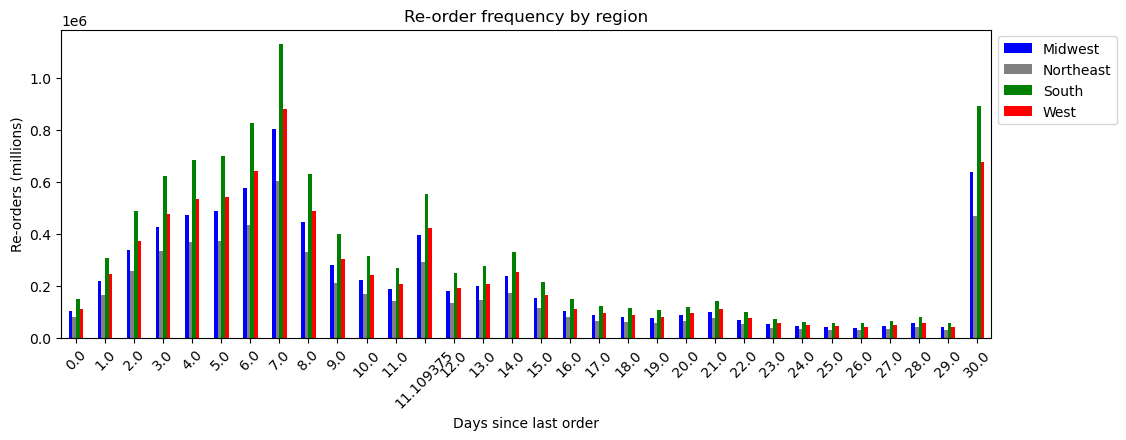

In [263]:
# Create a bar chart
bar_reorder_region = crosstab_reorder_region.plot(kind='bar', stacked= False, rot=45, figsize=(12,4), color=('blue', 'grey', 'green', 'red'))
plt.legend(title='', bbox_to_anchor=(1.0,1.0))
plt.title ('Re-order frequency by region', fontsize = 12)
plt.ylabel('Re-orders (millions)', fontsize = 10)
plt.xlabel('Days since last order', fontsize = 10)

In [264]:
# Compare normalized reorder frequency by customer loyalty
crosstab_reorder_region_norm = pd.crosstab(df_customer_profile['days_since_prior_order'], df_customer_profile['region'], normalize='columns', dropna = False)

In [265]:
# Check crosstab
crosstab_reorder_region_norm

region,Midwest,Northeast,South,West
days_since_prior_order,,,,
0.000000,0.014009,0.014333,0.014287,0.013958
1.000000,0.029810,0.030046,0.029835,0.030704
2.000000,0.046385,0.046793,0.047136,0.047030
3.000000,0.058881,0.061271,0.060180,0.060159
4.000000,0.065082,0.067270,0.066383,0.067217
5.000000,0.066920,0.068268,0.067743,0.068116
6.000000,0.079286,0.079448,0.080307,0.080838
7.000000,0.110680,0.110671,0.109595,0.110871
8.000000,0.061497,0.060575,0.061140,0.061284


Text(0.5, 0, 'Days since last order')

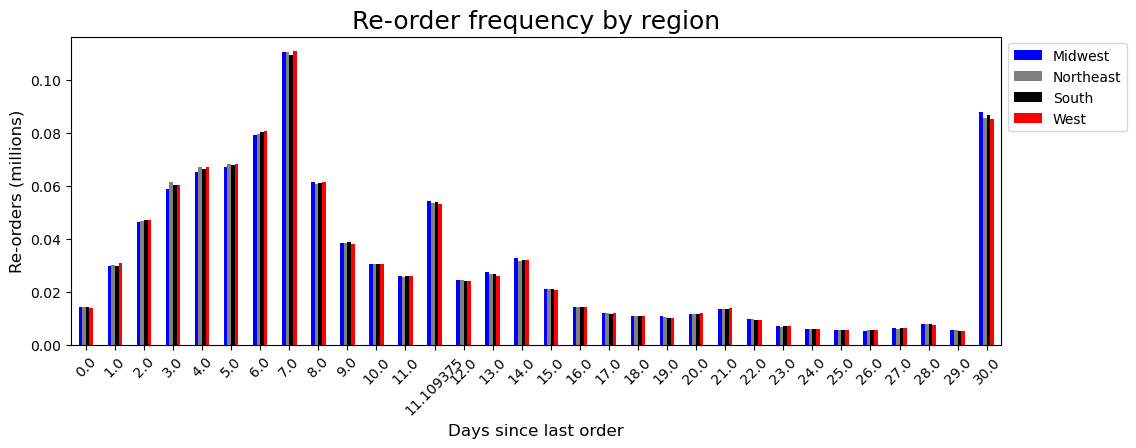

In [266]:
# Create a bar chart
bar_reorder_region_norm = crosstab_reorder_region_norm.plot(kind='bar', stacked= False, rot=45, figsize=(12,4), color=('blue', 'grey', 'black', 'red'))
plt.legend(title='', bbox_to_anchor=(1.0,1.0))
plt.title ('Re-order frequency by region', fontsize = 18)
plt.ylabel('Re-orders (millions)', fontsize = 12)
plt.xlabel('Days since last order', fontsize = 12)

 __There is very little variance in customer spending type from region to region__

## 8.8 Other customer profile trends

### 8.8.1 Customer re-order frequency by loyalty, family-type, and income group

In [267]:
# Compare reorder frequency by customer loyalty
crosstab_reorder_loyalty = pd.crosstab(df_customer_profile['days_since_prior_order'], df_customer_profile['loyalty_flag'], dropna = False)

In [268]:
# Check crosstab
crosstab_reorder_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.000000,239649,40517,157845
1.000000,626159,43354,262177
2.000000,973214,60662,417492
3.000000,1185968,86136,587710
4.000000,1202971,107496,747056
5.000000,1074717,136069,886697
6.000000,1090986,191359,1196418
7.000000,1351314,291064,1775061
8.000000,643383,185317,1065114


Text(0.5, 0, 'Days since last order')

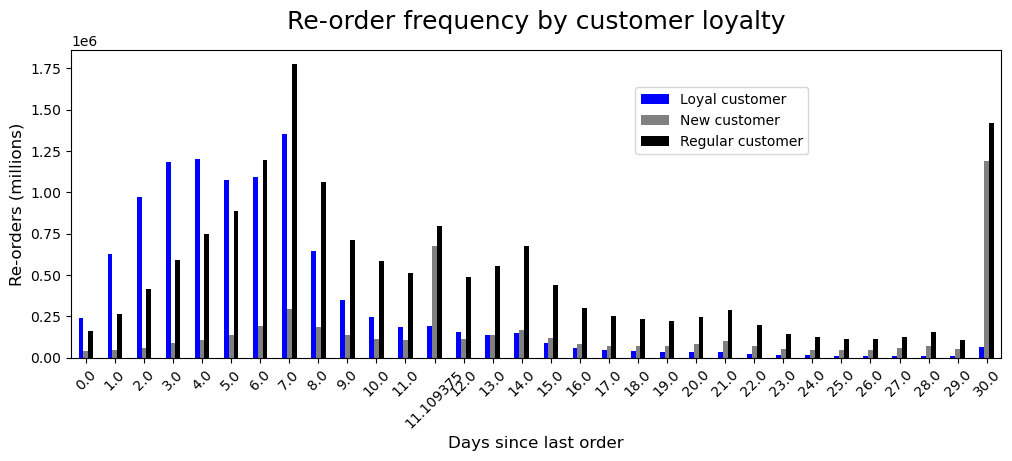

In [269]:
# Create a bar chart
bar_reorder_loyalty = crosstab_reorder_loyalty.plot(kind='bar', stacked= False, rot=45, figsize=(12,4), color=('blue', 'grey', 'black'))
plt.legend(title='', bbox_to_anchor=(.8,.9))
plt.title ('Re-order frequency by customer loyalty', fontsize = 18, pad = 15)
plt.ylabel('Re-orders (millions)', fontsize = 12)
plt.xlabel('Days since last order', fontsize = 12)

In [270]:
# Export bar chart
bar_reorder_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reorder_loyalty.png'))

__Most 'Loyal customers' re-order within one week of their last order, with the re-orders spread over the 7 days__  
__Re-orders for 'Regular customers' peaks on the 7th day of their last order and to a lesser degree on the 30th day__  

__The highest number of re-orders for 'New customers' happens after 30 days__  

__Possibly regular customers behavior is based on weekly and monthly shops, while 'Loyal customers' shop throughout the week on a frequent basis.  It is likely that 'New customers' don't have established re-ordering habits__

In [271]:
# Compare reorder frequency by family unit
# Create crosstab
crosstab_reorder_family = pd.crosstab(df_customer_profile['days_since_prior_order'], df_customer_profile['family_unit'], dropna = False)

In [272]:
# Check the crosstab
crosstab_reorder_family

family_unit,Married with kids,Mixed family,Single with kids,"Single, no kids"
days_since_prior_order,,,,
0.000000,303369,21929,41326,71387
1.000000,651324,44512,80890,154964
2.000000,1015953,70192,126534,238689
3.000000,1306462,89497,160589,303266
4.000000,1442919,98275,178557,337772
5.000000,1468617,102009,179153,347704
6.000000,1742887,118777,210261,406838
7.000000,2401039,164996,290489,560915
8.000000,1332054,91919,160002,309839


Text(0.5, 0, 'Days since last order')

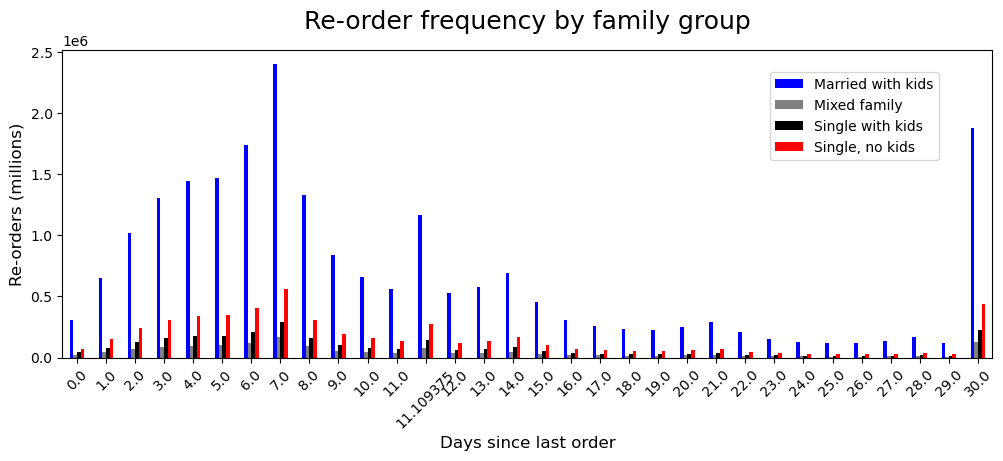

In [273]:
# Create a bar chart
bar_reorder_family = crosstab_reorder_family.plot(kind='bar', stacked= False, rot=45, figsize=(12,4), color=('blue', 'grey', 'black', 'red'))
plt.legend(title='', bbox_to_anchor=(.95,.95))
plt.title ('Re-order frequency by family group', fontsize = 18, pad=15)
plt.ylabel('Re-orders (millions)', fontsize = 12)
plt.xlabel('Days since last order', fontsize = 12)

In [274]:
# Export bar chart
bar_reorder_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reorder_family.png'), bbox_inches='tight')

In [275]:
# Compare reorder frequency by income group
# Create crosstab
crosstab_reorder_income = pd.crosstab(df_customer_profile['days_since_prior_order'], df_customer_profile['income_group'], dropna = False)

In [276]:
# Check the crosstab
crosstab_reorder_income

income_group,High,Low,Middle
days_since_prior_order,,,
0.000000,112924,71705,253382
1.000000,251081,133137,547472
2.000000,396674,190555,864139
3.000000,509924,234932,1114958
4.000000,560973,263251,1233299
5.000000,571271,272742,1253470
6.000000,667137,344888,1466738
7.000000,883501,546329,1987609
8.000000,510927,268851,1114036


Text(0.5, 0, 'Days since last order')

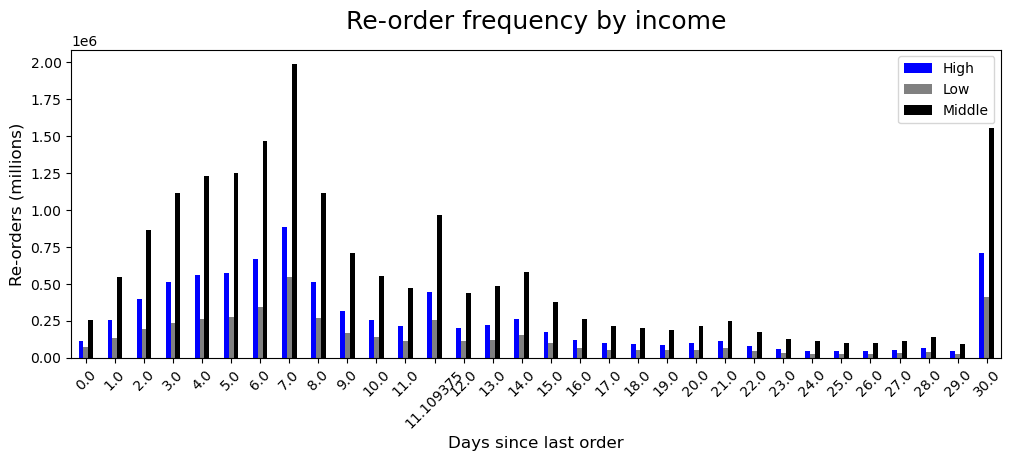

In [277]:
# Create a bar chart
bar_reorder_income = crosstab_reorder_income.plot(kind='bar', stacked= False, rot=45, figsize=(12,4), color=('blue', 'grey', 'black'))
plt.legend(title='', bbox_to_anchor=(1.0,1.0))
plt.title ('Re-order frequency by income', fontsize = 18, pad=15)
plt.ylabel('Re-orders (millions)', fontsize = 12)
plt.xlabel('Days since last order', fontsize = 12)

In [278]:
# Export bar chart
bar_reorder_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reorder_income.png'), bbox_inches='tight')

__Re-order behavior does not vary by family unit or income group.__  

__From the different analyses performed it is clear that the largest overall customer group is a 'Middle income' family made up of a married couple with at least one child (the second biggest, and maybe the one that marketing wants to target to grow is a 'High income' family with a married couple and at least one child).__

In [279]:
crosstab_family_income = pd.crosstab(df_customer_profile['family_unit'], df_customer_profile['income_group'], dropna = False)

In [280]:
crosstab_family_income

income_group,High,Low,Middle
family_unit,,,
Married with kids,6162926,3000980,12579805
Mixed family,18201,338176,1124795
Single with kids,1097511,245759,1302001
"Single, no kids",999406,867473,3227531


Text(0.5, 0, '')

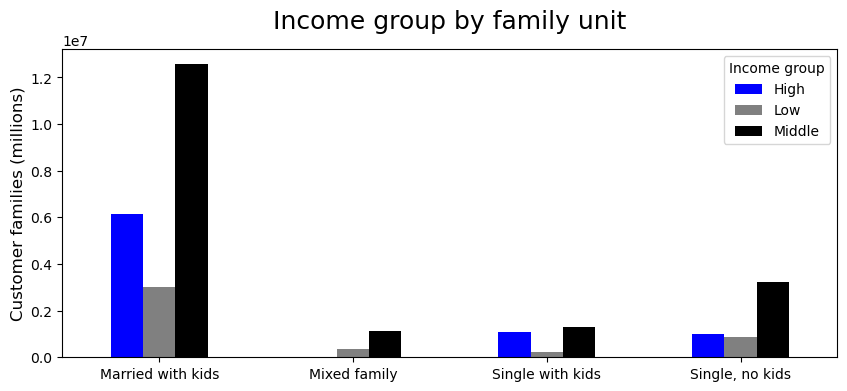

In [281]:
# Create a bar chart
bar_family_income = crosstab_family_income.plot(kind='bar', stacked= False, rot=0, figsize=(10,4), color=('blue', 'grey', 'black'))
plt.legend(title='Income group', bbox_to_anchor=(1.0,1.0))
plt.title ('Income group by family unit', fontsize = 18, pad=15)
plt.ylabel('Customer families (millions)', fontsize = 12)
plt.xlabel(None)

In [282]:
# Export bar chart
bar_family_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_income.png'))

# 9. Export final dataset(s) (Task 4.10 Part 1 Step 10)

In [283]:
# Export full final dataset to pickle
df_ords_prods_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_final.pkl'))

In [284]:
# Export customer profile dataset to pickle
df_customer_profile.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile_final.pkl'))